In [366]:
# Intialization 

In [367]:
import pandas as pd


In [368]:
#                Functions

In [369]:
def gy_df_show_info_statistics(df, full=False):
    if full:
        print( df.head())

    #partial
    print(df.info())
    

In [370]:
import requests
def get_movie_title(imdb_id):
  """
  Fetches the title of a movie or TV show from OMDb API given its IMDB ID.

  Args:
    imdb_id: The IMDB ID of the movie or TV show.
    api_key: Your OMDb API key.

  Returns:
    The title of the movie or TV show, or None if not found.
  """
  api_key = "c0ffb988"  
  url = f"http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}"
  response = requests.get(url)
  print(f"response" , response)
  data = response.json()
  print(f"data" , data)
  if data.get('Response') == 'True':
    return data.get('Title')
  else:
    return None

# Example usage:
#imdb_id = "tt7235466"
#title = get_movie_title(imdb_id)

# if title:
#   print(f"The title for IMDB ID {imdb_id} is: {title}")
# else:
#   print(f"Could not find a title for IMDB ID {imdb_id}")

In [371]:
# check - need to ... 
import requests
import pandas as pd

def search_tv_show(show_name, api_key):
    url = f"https://api.themoviedb.org/3/search/tv"
    params = {
        'api_key': "c0ffb988",
        'query': show_name
    }
    response = requests.get(url, params=params)
    return response.json()

def extract_tv_show_info(results):
    shows_info = []
    for show in results['results']:
        show_info = {
            'id': show.get('id'),
            'name': show.get('name'),
            'overview': show.get('overview'),
            'first_air_date': show.get('first_air_date'),
            'popularity': show.get('popularity'),
            'vote_average': show.get('vote_average'),
            'vote_count': show.get('vote_count')
        }
        shows_info.append(show_info)
    return shows_info

def update_dataframe_with_tv_show_info(df, tv_shows_info):
    for show_info in tv_shows_info:
        show_id = show_info['id']
        if show_id in df['id'].values:
            df.loc[df['id'] == show_id, 'name'] = show_info.get('name', df.loc[df['id'] == show_id, 'name'].values[0])
            df.loc[df['id'] == show_id, 'overview'] = show_info.get('overview', df.loc[df['id'] == show_id, 'overview'].values[0])
            df.loc[df['id'] == show_id, 'first_air_date'] = show_info.get('first_air_date', df.loc[df['id'] == show_id, 'first_air_date'].values[0])
            df.loc[df['id'] == show_id, 'popularity'] = show_info.get('popularity', df.loc[df['id'] == show_id, 'popularity'].values[0])
            df.loc[df['id'] == show_id, 'vote_average'] = show_info.get('vote_average', df.loc[df['id'] == show_id, 'vote_average'].values[0])
            df.loc[df['id'] == show_id, 'vote_count'] = show_info.get('vote_count', df.loc[df['id'] == show_id, 'vote_count'].values[0])
    return df

In [372]:
import pandas as pd

def gy_configure_pandas_display(option='min'):
    """Configure pandas display options.
    
    Args:
        option (str): 'max' to show all rows/columns or 'min' to reset to default.
    """
    if option == 'max':
        pd.set_option('display.max_rows', None)           # Show all rows
        pd.set_option('display.max_columns', None)        # Show all columns
        pd.set_option('display.width', None)              # Adjust display width to fit output
        pd.set_option('display.max_colwidth', None)       # No limit on column width
    elif option == 'min':
        # Reset all options to default
        pd.reset_option('display.max_rows')
        pd.reset_option('display.max_columns')
        pd.reset_option('display.width')
        pd.reset_option('display.max_colwidth')
        pd.reset_option('mode.use_inf_as_na')             # Reset use_inf_as_na
    else:
        raise ValueError("Invalid option. Use 'max' to configure or 'min' to revert to defaults.")



In [373]:
import pandas as pd
import re
import string

def clean_column(df, column_name, do_first_cycle=True, do_second_cycle=True):
    # Ensure the column is a string type
    df[column_name] = df[column_name].astype(str)

    # Create a new column name with prefix 'c_'
    new_column_name = "c_" + column_name

    # Define regular expressions for cleaning
    punctuation = re.compile(f'[{re.escape(string.punctuation)}]')
    # Define regex for non-alphanumeric characters, except for common Unicode script blocks
    non_alphanumeric = re.compile(r'[^A-Za-z0-9\s\u0400-\u04FF\u0370-\u03FF\u4E00-\u9FFF\uAC00-\uD7AF\uFF00-\uFFEF\u3040-\u30FF]', re.UNICODE)

    # Convert text to lowercase
    def to_lowercase(text):
        return text.lower()
    
    # First cleaning cycle: remove punctuation
    def first_cycle(text):
        return punctuation.sub('', text)
    if do_first_cycle:
        df[new_column_name] = df[column_name].apply(first_cycle)
        # Convert to lowercase after removing punctuation
        df[new_column_name] = df[new_column_name].apply(to_lowercase)

    # Second cleaning cycle: remove any non-alphanumeric characters (including special characters)
    def second_cycle(text):
        cleaned = non_alphanumeric.sub('', text)
        return cleaned.strip() if cleaned.strip() else text
        
    if do_second_cycle:
        df[new_column_name] = df[new_column_name].apply(second_cycle)

    return df.copy() 


In [374]:
# Compare and print if they are the same - cleaned_df \df
def gy_compare_2_df(df_org,df_comp):
    if df_org.equals(df_comp):
        print("The dataframes are the same.")
    else:
        print("The dataframes are not the same.")


In [375]:
def gy_savedf_to_excel(df, output_file):
    # Save the cleaned DataFrame to an Excel file
    output_file = output_file + ".xlsx'"
    cleaned_df.to_excel(output_file, index=True)

In [376]:
# Validate if the Adult column is Valid or not using the overview column 

import pandas as pd

def gy_validate_bool_column(df: pd.DataFrame, texts_column: str, bool_column: str, keywords_list: list) -> pd.DataFrame:
    # Create a new column for validation results
    df['v_' + bool_column] = df[bool_column]  # Initialize with the same values as boolColumn
    
    # Define a function to check if any keyword is in the text
    def contains_keyword(text, keywords):
        return any(keyword in text for keyword in keywords)
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        text = row[texts_column]
        bool_value = row[bool_column]
        
        # Check if any keyword is found in the text
        if contains_keyword(text, keywords_list):
            if not bool_value:
                # If bool_column is False but keywords are found, update the new column
                df.at[index, 'v_' + bool_column] = True
    
    # Check for discrepancies
    if not df[df[bool_column] != df['v_' + bool_column]].empty:
        print(f"There was a mistake in the column {bool_column}.")
    
    return df

In [377]:
# Split Date Column: The function splits the last_air_date column into last_air_date_Year, last_air_date_M, and last_air_date_D and renames the original column with a "Drop_" prefix.
# Check Production Status: It checks if the current date is past the last_air_date. If so, it sets v_in_production to the opposite of the in_production value.
# Handle Mismatches: The function identifies any discrepancies between the original in_production and the new v_in_production column.
# Print Messages: If mismatches are found, it prints a message indicating invalid data in the in_production column.

import pandas as pd
from datetime import datetime

def gy_process_dataframe(df, date_col, prod_col, prod_col_en=False):
    
    def validate_date(date_str):
        if isinstance(date_str, str):
            try:
                # Try to parse the date
                datetime.strptime(date_str, '%Y-%m-%d')
                return date_str
            except ValueError:
                # Return "Missing" if the date is invalid
                return 'Missing'
        else:
            # Return "Missing" if the value is not a string
            return 'Missing'
    
    def split_date_column(df, date_col):
        # Apply date validation
        df[date_col] = df[date_col].apply(validate_date)
        
        # Fill missing values with 'Missing' for dates that were not valid
        df[date_col] = df[date_col].fillna('Missing')
        
        # Split valid dates
        split_dates = df[date_col].str.split('-', expand=True)
        
        # Replace NaN with 'Missing' in the resulting columns
        split_dates = split_dates.fillna('Missing')
        
        # Assign split date columns to the dataframe
        df[[date_col + '_Year', date_col + '_M', date_col + '_D']] = split_dates
        
        # Rename the original column
        df.rename(columns={date_col: 'Drop_' + date_col}, inplace=True)
        return df
    
    def check_production_status(df, date_col, prod_col):
        current_date = datetime.utcnow()
        
        def production_status(row):
            if row[date_col + '_Year'] == 'Missing':
                return 'Missing'
            try:
                prod_date = datetime(int(row[date_col + '_Year']),
                                     int(row[date_col + '_M']),
                                     1)
                return not (current_date > prod_date)
            except ValueError:
                return 'Missing'
        
        df['v_' + prod_col] = df.apply(production_status, axis=1)
        
        # Check for any mismatches
        mismatches = df[df[prod_col] != df['v_' + prod_col]]
        if not mismatches.empty:
            print("There was invalid data in the 'in_production' column")
        
        return df

    # Process the dataframe
    df = split_date_column(df, date_col)
    
    if prod_col_en:
        df = check_production_status(df, date_col, prod_col) # 'in_production' is with  mistake data - so skip
    
    return df

In [378]:
# print df columns name 
def gy_getcolumns(df):
    print(df.columns.tolist())


In [8]:
import pandas as pd

def gy_add_prefix_to_columns(df, columns, prefix):
    """
    Add a prefix to specified columns in a DataFrame, ensuring that columns already prefixed are not renamed.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    columns (list): List of column names to add the prefix to.
    prefix (str): The prefix to add to the column names.

    Returns:
    pd.DataFrame: The modified DataFrame with the prefix added to specified columns.
    """
    # Create a dictionary with the old column names as keys and the new column names as values
    new_columns = {col: f'{prefix}_{col}' for col in columns if col in df.columns and not col.startswith(prefix)}
          
    # Rename the specified columns
    df.rename(columns=new_columns, inplace=True)
         
    return df


In [380]:
import pandas as pd

def encode_col_combinations(df, column_name):
    # Step 1: Sort language codes in each cell, handling NaN or non-string values
    df['Sorted_languages'] = df[column_name].apply(
        lambda x: ', '.join(sorted(x.split(', '))) if isinstance(x, str) else ''
    )
    
    # Step 2: Create a mapping of unique combinations to labels
    unique_combinations = df['Sorted_languages'].unique()
    combination_to_label = {comb: idx for idx, comb in enumerate(unique_combinations)}
    
    # Step 3: Apply the mapping to create the encoded column
    encoded_column_name = f'Encoded_{column_name}'
    df[encoded_column_name] = df['Sorted_languages'].map(combination_to_label)
    
    # Drop intermediate column if not needed
    df.drop(columns=['Sorted_languages'], inplace=True)
    
    return df, combination_to_label

In [381]:
import pandas as pd
from collections import Counter

def frequency_encode_col_combinations(df, column_name):
    """
    Applies frequency encoding to a column where each cell contains a comma-separated string of nominal values.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the column to encode.
        column_name (str): The name of the column to encode.

    Returns:
        tuple[pd.DataFrame, dict]: A tuple containing the DataFrame with the frequency-encoded column and the frequency map.
    """
    # Step 1: Convert values to lists
    def process_value(value):
        if isinstance(value, str):
            return value.split(',')  # Split strings into lists
        elif isinstance(value, list):
            return value  # Already a list
        else:
            return []  # Handle unexpected types
    
    df['Processed_languages'] = df[column_name].apply(process_value)
    
    # Step 2: Sort the lists and convert them back to comma-separated strings
    df['Sorted_languages'] = df['Processed_languages'].apply(
        lambda x: ', '.join(sorted(set(x)))  # Use set to handle duplicates
    )
    
    # Print intermediate results for debugging
    print("Processed Languages:\n", df['Processed_languages'].head())
    print("Sorted Languages:\n", df['Sorted_languages'].head())
    
    # Step 3: Calculate the frequency of each unique combination
    frequency_map = df['Sorted_languages'].value_counts().to_dict()
    
    # Print frequency map for debugging
    print("Frequency Map:\n", frequency_map)
    
    # Step 4: Apply the frequency map to create the encoded column
    encoded_column_name = f'Encoded_{column_name}_freq'
    df[encoded_column_name] = df['Sorted_languages'].map(frequency_map)
    
    # Additional Insights
    # Create a list of all languages
    all_languages = [lang for sublist in df['Sorted_languages'].dropna().str.split(', ') for lang in sublist]

    # Count occurrences of each language
    language_counts = Counter(all_languages)

    # Create a DataFrame for language counts
    language_counts_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Occurrences'])
    language_counts_df = language_counts_df.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)

    # Print the summary of key information
    print("\nSummary of Key Information:")

    # Print most frequent languages
    print("\nMost Frequent Languages:")
    for _, row in language_counts_df.iterrows():
        print(f"{row['Language']}: {row['Occurrences']} occurrences")

    # Count occurrences of language combinations
    combination_counts = Counter(
        frozenset(sublist) for sublist in df['Sorted_languages'].dropna().str.split(', ')
    )

    # Create a DataFrame for combinations counts
    combination_counts_df = pd.DataFrame(
        [(', '.join(sorted(combo)), count) for combo, count in combination_counts.items()],
        columns=['Combination', 'Occurrences']
    )
    combination_counts_df = combination_counts_df.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)

    # Print language combinations
    print("\nLanguage Combinations:")
    for _, row in combination_counts_df.iterrows():
        combination = row['Combination']
        occurrences = row['Occurrences']
        if occurrences > 1:  # Only print combinations that occur more than once
            print(f"{combination}: {occurrences} occurrences")
        else:
            print(f"Rare combination like {combination} appears only once")

    # Drop intermediate columns
    df.drop(columns=['Processed_languages', 'Sorted_languages'], inplace=True)

    return df, frequency_map

# Example usage:
# df = pd.DataFrame({
#     'languages': ['English,French', 'Spanish', 'English,Spanish', 'French,German', 'German']
# })
# df_processed, frequency_map = frequency_encode_col_combinations(df, 'languages')
# print("Processed DataFrame:")
# print(df_processed)
# print("\nFrequency Map:")
# print(frequency_map)


In [382]:
import pandas as pd

def gy_process_column(df, column, prefix="Drop", id_column='id', en=False):
    """
    Process the column in a DataFrame to extract unique texts and represent them using one-hot encoding.
    Handles special characters and spaces. Ensures no duplicates are present.
    The ID column is preserved as the index.
    Verify Reconstruction buggy removed
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    column (str): The name of the column containing concatenated text strings.
    prefix (str): The prefix to add to the original column.
    id_column (str): The name of the column containing unique IDs.

    Returns:
    pd.DataFrame: The modified DataFrame with one-hot encoded text columns and the original column prefixed.
    """
    # Step 1: Set the ID column as the index
    if id_column in df.columns:
        df.set_index(id_column, inplace=True)
    else:
        raise ValueError(f"Column '{id_column}' does not exist in DataFrame.")

    # Save the ID column as a variable to reattach later
    ids = df.index.copy()

    # Step 2: Extract Unique Texts
    def extract_unique_texts(df, column):
        all_texts = set()
        for texts in df[column].replace('', 'NaN').fillna('').astype(str).str.split(','):
            for text in texts:
                cleaned_text = text.strip().replace(' & ', ' ').replace(' ', '')
                if cleaned_text:
                    all_texts.add(cleaned_text)
        return sorted(all_texts)

    # Step 3: One-Hot Encoding
    def one_hot_encode_texts(df, column, unique_texts):
        for text in unique_texts:
            df[text] = df[column].replace('', 'NaN').fillna('').astype(str).apply(
                lambda x: 1 if text in x.replace(" ", "").split(',') else 0)
        return df

    # Step 4: Verify Reconstruction
    def verify_reconstruction(df, column, unique_texts):
        # Reconstruct the original concatenated text strings from the one-hot encoded columns
        reconstructed_column = df[unique_texts].apply(lambda row: ', '.join(sorted(row.index[row == 1])), axis=1)
        
        # Compare the reconstructed column with the original column (after prefixing and consistent formatting)
        original_column = df[f'{prefix}_{column}'].replace('', 'NaN').fillna('').astype(str).apply(
            lambda x: ', '.join(sorted(x.replace(" ", "").split(',')))
        )
        
        if all(reconstructed_column == original_column):
            print("Reconstruction is valid.")
        else:
            print("Invalid. There are mismatches between the reconstruction and the original column.")
            # Optionally, you can print the mismatched rows for debugging
            mismatches = df[reconstructed_column != original_column]
            print(mismatches)
    
    # Extract unique texts
    unique_texts = extract_unique_texts(df, column)
    print("Unique texts extracted:", unique_texts)
    print("Number of unique texts:", len(unique_texts))
    
    # One-hot encode texts
    df = one_hot_encode_texts(df, column, unique_texts)
    
    # Add prefix to the original column
    df.rename(columns={column: f'{prefix}_{column}'}, inplace=True)
    
    # Verify reconstruction - removed bugy
    #verify_reconstruction(df, column, unique_texts)
    
    # # Reattach the ID column
    if en and id_column not in df.columns:
        df[id_column] = ids
        print(f"en={en} and id_column not in df.columns")  
    else:
        print("check df[id_column]", id_column not in df.columns )
       

    if not en and id_column not in df.columns:
        #Reset index to include the ID column as a normal column
        df.reset_index(inplace=True)
        
    return df


In [383]:
# created_by ,networks  should pertform _Process_Column to split it one hot 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def gy_correlationdf(dfload):
    # Set options to display all rows and columns
    pd.set_option('display.max_rows', None)  # or a specific number if you prefer
    pd.set_option('display.max_columns', None)  # or a specific number if you prefer
    pd.set_option('display.width', None)  # Ensures the full width is shown
    
    # Select only numeric columns
    numeric_df = dfload.select_dtypes(include=['number'])
    
    # Calculate correlation
    correlation = numeric_df.corr()
    # Display the first few rows of the correlation matrix
    print("First few rows of the correlation matrix:")
    print(correlation.head())
    
    # Set a threshold for strong correlations
    threshold = 0.7
    strong_correlations = correlation[(correlation.abs() > threshold) & (correlation.abs() < 1)]
    print("Strong correlations:")
    print(strong_correlations)
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()


In [5]:
import pandas as pd

def gy_drop_columns_with_keyword(df: pd.DataFrame, keyword: str = "Drop") -> pd.DataFrame:
    # List comprehension to filter out columns with the keyword and not the 'id' column
    columns_to_keep = [col for col in df.columns if keyword not in col and col != 'id']
    # Add 'id' column if it was not already included
    if 'id' not in columns_to_keep:
        columns_to_keep.append('id')
    # Select only the columns to keep
    return df[columns_to_keep]

In [385]:
import pandas as pd

def gy_check_dataframe_index(df):
    """
    Check if the DataFrame has an index and print the index details.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    """
    if df.index is not None:
        print("The DataFrame has an index.")
        print("Index:", df.index)
    else:
        print("The DataFrame does not have an index.")

In [386]:
# utility reset index
import pandas as pd

def gy_check_and_reset_index(df):
    """
    Check if the DataFrame has a custom index, reset the index, and return the head of the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    
    Returns:
    pd.DataFrame: The head of the DataFrame with the index reset if it was a custom index.
    """
    # Check if the index is not the default RangeIndex
    if not isinstance(df.index, pd.RangeIndex):
        print("The DataFrame has a custom index.")
        print("Index:", df.index)
        # Reset the index without dropping the old index
        df_reset = df.reset_index()
    else:
        print("The DataFrame has the default RangeIndex.")
        df_reset = df

    # Return the head of the DataFrame
    return df_reset.head()

#    A   B
# 0  0  10
# 1  1  11
# 2  2  12
# 3  3  13
# 4  4  14

# DataFrame with 'A' as the index:
#     B
# A    
# 0  10
# 1  11
# 2  12
# 3  13
# 4  14

In [387]:
import pandas as pd

def gy_print_column_types(df):
    """
    Print each column name with its data type for the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame for which to print column types.
    """
    # Get data types of each column
    column_types = df.dtypes

    # Convert to a list of tuples (column name, type)
    column_types_list = list(column_types.items())

    # Print each column name with its type
    for column_name, dtype in column_types_list:
        print(f"Column '{column_name}' has type '{dtype}'")




In [388]:
import pandas as pd

def gy_round_columns(df, columns, decimal_places):
    """
    Rounds the specified columns in the DataFrame to a given number of decimal places.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be rounded.
    columns (list): A list of column names to round.
    decimal_places (int): The number of decimal places to round to. 
                          Use 0 for integer rounding.
    
    Returns:
    pd.DataFrame: The DataFrame with the specified columns rounded.
    """
    df[columns] = df[columns].round(decimal_places)

    if decimal_places == 0:
        df[columns] = df[columns].astype('int64')
         
    return df

# Example usage:
# df = round_columns(df, ['vote_average', 'another_column'], 2)

In [389]:
# Step 2: Extract Unique Texts
def gy_extract_unique_texts(df, column):
    all_texts = set()
    for texts in df[column].replace('', 'NaN').fillna('').astype(str).str.split(','):
        for text in texts:
            cleaned_text = text.strip().replace(' & ', ' ').replace(' ', '')
            if cleaned_text:
                all_texts.add(cleaned_text) 
    return sorted(all_texts)

In [390]:
import pandas as pd

def gy_extract_and_categorize_networks(df, column_name):
    # Define the main list of globally recognized TV networks
    main_list = [
    'CNN', 'BBC One', 'ESPN', 'Disney Channel', 'Disney+' , 'HBO', 'HBO Max', 'BBC America', 'NBC', 'ABC', 'Apple TV+' ,
    'FOX', 'CBS','CBS All Access' , 'Cartoon Network', 'Discovery Channel', 'ITV1', 'Sky One', 'Sky Atlantic', 
    'TNT', 'Hulu', 'Amazon Prime Video', 'Prime Video' ,'Netflix', 'Comedy Central', 'MTV', 'Nickelodeon', 
    'Bravo', 'USA Network', 'FX', 'TBS', 'E!', 'History Channel', 'National Geographic', 
    'Syfy', 'Showtime', 'BET', 'VH1', 'Channel 4', 'NBC Sports', 'BBC World News', 
    'ABC Family', 'BBC Two', 'AMC',
    ]


   # Convert main_list to a set for faster lookups
    main_list_set = set(main_list)

  # Define regional networks organized by their respective regions
    regional_networks = {
    'Asia': [
        '&TV', '24KitchenTürkiye', '2M', '2x2', 'ABEMA', 'ABS-CBN', 'AGTV', 'AISPLAY',
        'AKT', 'ALTBalaji', 'AP1', 'APTN', 'ARD-alpha', 'ARIRANGTV', 'ART', 'ARYDigital',
        'AT-X', 'ATV', 'AXNAsia', 'AXNKorea', 'ABEMA SPECIAL', 'AcFun', 'AkashBangla',
        'AkitaAsahiBroadcasting', 'Al-NaharDrama', 'AlAoula', 'Alhayah', 'AlphaCyprus',
        'Alsumaria', 'AmarinTV', 'AnhuiTelevision', 'AniOne', 'AnimaxAsia', 'AnimaxKorea',
        'Antena3', 'AsiaN', 'AsianFoodChannel', 'Asianet', 'Astro', 'AstroAEC',
        'AstroCeria', 'AstroFirst', 'AstroGO', 'AstroMaya', 'AstroOasis', 'AstroPrima',
        'AstroRia', 'AstroShuangXing', 'AstroVaanavil', 'AstroVinmeen', 'AstroWarna',
        'Azteca7', 'BAYAMC', 'BeeTV', 'BeijingTelevision', 'BS-TBS', 'BS11', 'BSAsahi',
        'BSFuji', 'BSJapan', 'BSJapanext', 'BSN', 'BSYoshimoto', 'BabyTV', 'BandSports',
        'BanglaVision', 'Bindass', 'Boomerang', 'CartoonNetworkAsia', 'CCTV', 'CCTV-1',
        'CCTV-10', 'CCTV-14', 'CCTV-17', 'CCTV-2', 'CCTV-4', 'CCTV-6', 'CCTV-8', 'CCTV-9',
        'Channel9', 'ChannelA', 'ChukyoTV', 'CookingChannelAsia', 'CriteoTV', 'DisneyChannelAsia',
        'DisneyChannelMiddleEast', 'DisneyJuniorAsia', 'DisneyJuniorLatinAmerica', 'DisneyXDAsia',
        'DramaFever', 'DreamWorksChannel', 'Duna', 'DW', 'DynastyTV', 'EastTV', 'EBCDrama',
        'EBCVariety', 'EBS1', 'EChannel', 'Eptv', 'ErTugrulGhazi', 'ETV', 'Euronews', 'Eurovision',
        'FamilyChannelAsia', 'FamilyChannelMiddleEast', 'FamilyJr.', 'France.tv', 'FujiTV',
        'FujiTVNEXT', 'FujiTVTWO', 'GMM25', 'GMA', 'GTV', 'Gemplex', 'GeoKahani', 'GeoTV',
        'HBOAsia', 'HBOGo', 'HTV', 'HappyKids', 'iQIYI', 'IndiaToday', 'IsharaTV',
        'IshikawaTV', 'JapaneseTV', 'K-STAR', 'KBS1', 'KBS2', 'KBSDrama', 'KBSJoy', 'KBSKids',
        'KBSKyoto', 'KBSStory', 'KBSWorld', 'KTV', 'KawaiiTV', 'Kix', 'KoreanCentralTelevision',
        'Kplus', 'LA7', 'LineTV', 'MangoTV', 'Mediacorp', 'Mnet', 'NHK', 'NHKBS', 'NHKBS1',
        'NHKBS4K', 'NHKBS8K', 'NHKBSPremium', 'NHKEducationalTV', 'NHKG', 'NHKWORLD-JAPAN',
        'NicoNicoDouga', 'NipponTelevision', 'NowTV', 'PCTV', 'PlayAsia', 'QYOUIndia',
        'RTB', 'SABTV', 'SET', 'SETAsia', 'SunTV', 'SuryaTV', 'TV9', 'TVAsahi', 'TVQ',
        'TVTokyo', 'Teletica', 'TenSports', 'TenSportsIndia', 'TheQIndia', 'TokaiTV', 
        'TokyoMX', 'VTV', 'VikatanTV', 'ViuTV', 'WOWOW', 'YTV', 'ZoomTV'
    ],
    'Europe': [
        '1+1', '10Play', '13C', '24Kanal', '24horas', '3Cat', '3Plus', '3sat', '59thParallelProductionsInc',
        '6ter', '7+', '8TV', '9Go!', 'A+ENetworksUK', 'ABCMe', 'ABCNews', 'ABEMA', 'ABCMe',
        'ABCNews', 'ARD', 'ARD-alpha', 'ARTE', 'ASTROmALL', 'ATV', 'AVROTROS', 'BILDTV',
        'BFMTV', 'BNNVARA', 'BNT1', 'BR-alpha', 'BRFernsehen', 'BUILDSeries', 'BYUTelevision',
        'BBCAlba', 'BBCEarth', 'BBCFirst', 'BBCFour', 'BBCKids', 'BBCKnowledge', 'BBCNews',
        'BBCOne', 'BBCOneNorthernIreland', 'BBCOneScotland', 'BBCOneWales', 'BBCParliament',
        'BBCScotland', 'BBCSelect', 'BBCThree', 'BBCTwo', 'BBCUKTV', 'BBCWorldNews',
        'BBCiPlayer', 'Canal+', 'Canal11', 'Canal44UDGTV', 'CanalBIS', 'CanalJ', 'CanalOff',
        'CanalOnce', 'CanalPlay', 'CanalQ', 'CanalSur', 'CartoonNetwork', 'CBSReality',
        'Channel4', 'Channel5', 'Channel9', 'ChannelA', 'CrimeInvestigationPolsat', 'Culturebox',
        'Curta!', 'DStv', 'DasErste', 'DeutscheWelle', 'Discovery', 'DiscoveryScience',
        'DisneyChannel', 'DisneyJunior',"D'LIVE" ,'DisneyXD', 'E!', 'E4', 'Eurosport', 'FTV', 'FamilyGekijo',
        'Filmnet', 'France.tv', 'France2', 'France3', 'France4', 'France5', 'FranceTVSlash',
        'GBNews', 'GigaGloob', 'GlobalTV', 'Gulli', 'HD1', 'HolmesPlace', 'HSB', 'HUMAN',
        'ITV1', 'ITV2', 'ITV3', 'ITV4', 'ITVBe', 'Joyn', 'Kabel1Doku', 'La1', 'La2', 'La5',
        'LaCinq', 'LaRed', 'LaTrois', 'LaUne', 'LaXarxa', 'LCN', 'LCP', 'LRTTelevizija',
        'LTV1', 'MTV3', 'NRJ12', 'NRK', 'NRK1', 'NRK3', 'NRKP3', 'NRKSuper', 'NRT2',
        'NTV', 'N24', 'NDRFernsehen', 'NTV', 'NOS', 'NPO1', 'NPO2', 'NPO3', 'NQQ', 'Rai1',
        'Rai2', 'Rai3', 'RTL', 'RTVDrenthe', 'RadioKanal24', 'Rai1', 'Rai2', 'Rai3', 'Radio100',
        'SAB TV', 'SRF', 'SWR', 'Sat1', 'SkyShowtime', 'SkyUK', 'Studio100TV', 'Super RTL',
        'Syfy', 'TF1', 'TLC', 'TV2', 'TV3', 'TV4', 'TV5Monde', 'TV6', 'TV8', 'TVE', 'TVI',
        'TVP', 'Telemundo', 'Univision', 'VTM', 'WDR', 'ZDF', 'ZDFneo', 'ZDFinfo', 'ZDFKultur',
        'ZDFZDF', 'ZDFZDFKultur'
    ],
    'North America': [
        'A&E', 'AMC', 'ABC', 'ABCComedy', 'ABCFamily', 'ABCKIDS', 'ABCMe', 'ABCNews', 'ABCTV',
        'AETN', 'ANIMAX', 'AXN', 'BBCAmerica', 'BET', 'Bravo', 'CartoonNetwork', 'CBS',
        'CBSNews', 'CMT', 'ComedyCentral', 'DiscoveryChannel', 'E!', 'ESPN', 'FOX',
        'FOXNews', 'FX', 'HBO', 'HULU', 'INSP', 'Lifetime', 'MTV', 'NBC', 'NBCSports',
        'NationalGeographic', 'PBS', 'QVC', 'Syfy', 'TBS', 'TLC', 'TNT', 'TravelChannel',
        'USA', 'VH1', 'WE', 'ABC7', 'BNC', 'BSP', 'CANAL5', 'HBO2', 'Oxygen', 'Starz',
        'StarzEncore', 'StarzKids', 'StarzPLAY', 'Showtime', 'Showtime2', 'TBS', 'TLC',
        'TheCW', 'TVLand', 'Vice'
    ]
    }
    # Remove networks from regional lists if they are in the main list
    for region, networks in regional_networks.items():
        regional_networks[region] = [network for network in networks if network not in main_list]

    def categorize_network(network):
        network_list = [n.strip() for n in str(network).split(',')]  # Split on ',' and strip any extra whitespace
        for net in network_list:
            if net in main_list:
                return "Main Network"
        for region, networks in regional_networks.items():
            if any(net in networks for net in network_list):
                return f"{region} Network"
        return "Other"
    
    # Create a new column 'v_network' based on the categorization
    df['v_network'] = df[column_name].apply(lambda x: categorize_network(x))
        
    return df




In [391]:
import pandas as pd

def gy_convert_origin_and_languages(df):
    # Mapping from country code to continent
    country_to_continent = {
        'US': 'North America', 'CA': 'North America', 'MX': 'North America', 
        'GB': 'Europe', 'FR': 'Europe', 'DE': 'Europe', 'IT': 'Europe', 'ES': 'Europe', 'RU': 'Europe',
        'TR': 'Europe', 'CO': 'South America', 'DK': 'Europe', 'IE': 'Europe', 'SE': 'Europe', 
        'NO': 'Europe', 'JO': 'Asia', 'VE': 'South America', 'BE': 'Europe', 'PR': 'North America', 
        'IS': 'Europe', 'AT': 'Europe', 'AR': 'South America', 'CL': 'South America', 
        'ZA': 'Africa', 'NG': 'Africa', 'EG': 'Africa', 'KE': 'Africa', 'SA': 'Asia', 
        'AE': 'Asia', 'IR': 'Asia', 'PK': 'Asia', 'VN': 'Asia', 'TH': 'Asia', 
        'MY': 'Asia', 'SG': 'Asia', 'PH': 'Asia', 'ID': 'Asia', 'BD': 'Asia', 
        'IL': 'Asia', 'PL': 'Europe', 'FI': 'Europe', 'LU': 'Europe', 'CH': 'Europe', 
        'PT': 'Europe', 'NL': 'Europe', 'EC': 'South America', 'TW': 'Asia', 
        'HK': 'Asia', 'CZ': 'Europe', 'RO': 'Europe', 'RS': 'Europe', 'SK': 'Europe', 
        'HU': 'Europe', 'GR': 'Europe', 'UA': 'Europe', 'KZ': 'Asia', 'HR': 'Europe', 
        'IQ': 'Asia', 'KW': 'Asia', 'LB': 'Asia', 'SY': 'Asia', 'PE': 'South America', 
        'UY': 'South America', 'CU': 'North America', 'BG': 'Europe', 'GE': 'Asia',
        # Add more country codes as needed
    }
    
    def get_continent(country_code):
        return country_to_continent.get(country_code, 'Unknown')
    
    # Check if 'origin_country' exists in the DataFrame
    if 'origin_country' in df.columns:
        # Convert origin_country to origin_continent
        df['origin_continent'] = df['origin_country'].apply(lambda x: get_continent(str(x).split(',')[0]))  # Assuming the first country is the main one
    else:
        df['origin_continent'] = 'Unknown'  # Or handle this case as needed
    
    # Check if 'spoken_languages' exists in the DataFrame
    if 'spoken_languages' in df.columns:
        # Convert spoken_languages to the number of languages and whether English is one of them
        df['spoken_languages_cnt'] = df['spoken_languages'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
        df['Is_en_in_spoken_languages'] = df.apply(
            lambda row: 'Missing' if row['spoken_languages_cnt'] == 0 else 'English' in [lang.strip() for lang in str(row['spoken_languages']).split(',')],
            axis=1
        )
    else:
        # Handle the missing 'spoken_languages' column
        df['spoken_languages_cnt'] = 0
        df['Is_en_in_spoken_languages'] = 'Missing'
    
    # Rename original columns with 'Drop' prefix - on outer function
  
    return df

In [244]:
import pandas as pd

def null_notnull_summary(df):
    # Count the number of null values in each column
    null_counts = df.isna().sum()
    
    # Count the total number of rows
    total_rows = len(df)
    
    # Calculate the number of non-null values in each column
    not_null_counts = total_rows - null_counts
    
    # Create a DataFrame to show null and non-null counts
    summary_df = pd.DataFrame({
        'Null Count': null_counts,
        'Not Null Count': not_null_counts
    })
    
    # Print the summary DataFrame
    print(summary_df)
    
    return summary_df

In [245]:
import pandas as pd

def gy_handle_duplicates_take_last(df):
    """
    Marks duplicates except the last occurrence and drops all duplicates.
    Found that it could be mean or latest value updated one
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    
    Returns:
    pd.DataFrame: The DataFrame with duplicates marked and removed.
    """
    # Mark duplicates except the last occurrence
    df['is_duplicate_except_last'] = df.duplicated(keep='last')
    print("Duplicates except the last occurrence:")
    print(df)
    
    # Drop all duplicates
    df = df.drop_duplicates(keep='last')
    print("Duplicates removed:")
    print(df)
    
    return df

In [246]:
import pandas as pd

def gy_check_dataframe(df):
    """
    Checks each column in the DataFrame for null values, None, NaN, duplicates, and value counts.
    Suggests other checks before saving to a flat file.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Checking column: {column}")
        
        # Check for null values
        null_count = df[column].isnull().sum()
        print(f"Null values: {null_count}")
        
        # Check for None values
        none_count = df[column].isna().sum()
        print(f"None values: {none_count}")
        
        # Check for NaN values
        nan_count = df[column].isna().sum()
        print(f"NaN values: {nan_count}")
        
        # Check for duplicates
        duplicate_count = df[column].duplicated().sum()
        print(f"Duplicate values: {duplicate_count}")
        
        # Value counts
        value_counts = df[column].value_counts(dropna=False)
        print(f"Value counts:\n{value_counts}")
        
        # Suggest other checks
        if df[column].dtype == 'object':
            print(f"Suggested check: Ensure no leading/trailing spaces in {column}")
        if df[column].dtype == 'float64':
            print(f"Suggested check: Convert {column} to int64 if appropriate")
        if df[column].dtype == 'datetime64[ns]':
            print(f"Suggested check: Ensure {column} is in the correct date format")
        
        print("\n")

In [4]:
import pandas as pd

def gy_preprocess_dataframe(df):
    """
    Function to perform data preparation on the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to preprocess.
    
    Returns:
    - pd.DataFrame: The preprocessed DataFrame.
    """
    
    # Example: Convert 'status' column to category
    if 'status' in df.columns:
        df['status'] = df['status'].astype('category')
    
    # Example: Convert 'first_air_date_Year' to numeric
    if 'first_air_date_Year' in df.columns:
        df['first_air_date_Year'] = pd.to_numeric(df['first_air_date_Year'], errors='coerce')
    
    # Example: Convert 'is_duplicate_except_last' to category if boolean
    if 'is_duplicate_except_last' in df.columns and df['is_duplicate_except_last'].dtype == 'bool':
        df['is_duplicate_except_last'] = df['is_duplicate_except_last'].astype('category')
    
    # Example: Handle missing values by filling with a placeholder (e.g., 'Unknown')
    df.fillna('Unknown', inplace=True)
    
    # Example: Encode categorical columns
    categorical_columns = ['origin_continent', 'v_network']
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype('category').cat.codes
    
    # Example: Drop duplicate columns if any
    df = df.loc[:,~df.columns.duplicated()]
    
    return df

In [248]:
# import pandas as pd
# import re

# # Predefined mappings for languages
# predefined_mappings = {
#     'kn': 'Kannada',    
#     'ko': 'Korean',
#     'en': 'English',
#     'ur': 'Urdu',
#     'zh': 'Chinese',
#     'ja': 'Japanese',
#     'th': 'Thai',
#     'ar': 'Arabic',
#     'hi': 'Hindi',
#     'bn': 'Bengali',
#     'ta': 'Tamil',
#     'vi': 'Vietnamese',
#     'ms': 'Malay',
#     'my': 'Burmese',
#     'km': 'Khmer',
#     'lo': 'Lao',
#     'ml': 'Malayalam',
#     'te': 'Telugu',
#     'si': 'Sinhala',
#     'es': 'Spanish',
#     'fr': 'French',
#     'de': 'German',
#     'it': 'Italian',
#     'pt': 'Portuguese',
#     'ru': 'Russian',
#     'tr': 'Turkish',
#     'fa': 'Persian',
#     'sw': 'Swahili',
#     'he': 'Hebrew',
#     'lt': 'Lithuanian',
#     'nl': 'Dutch',
#     'gd': 'Scottish Gaelic',
#     'el': 'Greek',
#     'nn': 'Norwegian Nynorsk',
#     'af': 'Afrikaans',
#     'is': 'Icelandic',
#     'da': 'Danish',
#     'xx': 'Unknown',
#     'ro': 'Romanian',
#     'cn': 'Cantonese',
#     'sv': 'Swedish',
#     'pl': 'Polish',
#     'no': 'Norwegian',
#     'ca': 'Catalan',
#     'la': 'Latin',
#     'yi': 'Yiddish',
#     'sk': 'Slovak',
#     'hu': 'Hungarian',
#     'mn': 'Mongolian',
#     'dz': 'Dzongkha',
#     'id': 'Indonesian',
#     'wo': 'Wolof',
#     'oj': 'Ojibwe',
#     'tl': 'Tagalog',
#     'ki': 'Kikuyu',
#     'cy': 'Welsh',
#     'os': 'Ossetic',
#     'mr': 'Marathi',
#     'pa': 'Punjabi',
#     'mo': 'Moldovan',
#     'ln': 'Lingala',
#     'tw': 'Twi',
#     'fi': 'Finnish',
#     'xh': 'Xhosa',
#     'zu': 'Zulu',
#     'cs': 'Czech',
#     'ku': 'Kurdish',
#     'ga': 'Irish',
#     'lb': 'Luxembourgish',
#     'gu': 'Gujarati',
#     'oc': 'Occitan',
#     'gl': 'Galician',
#     'nv': 'Navajo',
#     'sq': 'Albanian',
#     'sr': 'Serbian',
#     'uk': 'Ukrainian',
#     'rw': 'Kinyarwanda',
#     'mi': 'Maori',
#     'ka': 'Georgian',
#     'iu': 'Inuktitut',
#     'ne': 'Nepali',
#     'bg': 'Bulgarian',
#     'hr': 'Croatian',
#     'ab': 'Abkhazian',
#     'eu': 'Basque',
#     'et': 'Estonian',
#     'sh': 'Serbo-Croatian',
#     'tt': 'Tatar',
#     'ps': 'Pashto',
#     'lv': 'Latvian',
#     'pi': 'Pali',
#     'az': 'Azerbaijani',
#     'bs': 'Bosnian',
#     'kk': 'Kazakh',
#     'se': 'Northern Sami',
#     'ha': 'Hausa',
#     'ig': 'Igbo',
#     'yo': 'Yoruba',
#     'am': 'Amharic',
#     'ie': 'Interlingue',
#     'bo': 'Tibetan',
#     'dv': 'Divehi',
#     'fy': 'Western Frisian',
#     'qu': 'Quechua',
#     'ti': 'Tigrinya',
#     'kr': 'Kanuri',
#     'mk': 'Macedonian',
#     'sl': 'Slovenian',
#     'tn': 'Tswana',
#     'fo': 'Faroese',
#     'uz': 'Uzbek',
#     'ay': 'Aymara',
#     'wa': 'Walloon',
#     'ce': 'Chechen',
#     'sd': 'Sindhi',
#     'av': 'Avaric',
#     'nb': 'Norwegian Bokmål',
#     'hz': 'Herero',
#     'ho': 'Hiri Motu',
#     'tg': 'Tajik',
#     'ug': 'Uighur',
#     'jv': 'Javanese',
#     'sm': 'Samoan',
#     'as': 'Assamese',
#     'nr': 'Ndebele',
#     'so': 'Somali',
#     'ee': 'Ewe',
#     'ny': 'Chichewa',
#     'be': 'Belarusian',
#     'hy': 'Armenian',
#     'ak': 'Akan',
#     'or': 'Odia',
#     'st': 'Sotho',
#     'gn': 'Guarani',
#     'mt': 'Maltese',
#     'eo': 'Esperanto',
#     'rm': 'Romansh',
#     'gv': 'Manx',
#     'aa': 'Afar',
#     'sa': 'Sanskrit',
#     'sg': 'Sango',
#     'ba': 'Bashkir',
#     'cr': 'Cree'
# }

# # Step 1: Extract valid languages
# def extract_valid_languages(languages):
#     valid_languages = {}
#     for lang_entry in languages.dropna():
#         for lang in lang_entry.split(','):
#             lang = lang.strip()
#             if lang.isascii() and lang not in valid_languages:
#                 valid_languages[lang] = predefined_mappings.get(lang, None)
#     return valid_languages

# # Step 2: Fill spoken_languages
# def fill_spoken_languages(df, language_map):
#     def fill_row(row):
#         if row['spoken_languages'] == "" or pd.isna(row['spoken_languages']) or any(char in row['spoken_languages'] for char in ['/', '?']):
#             # Check languages column
#             for col in ['languages', 'original_language']:
#                 if pd.notna(row[col]):
#                     lang_entry = row[col]
#                     for lang in lang_entry.split(','):
#                         lang = lang.strip()
#                         if lang.isascii():
#                             mapped_value = language_map.get(lang, None)
#                             if mapped_value:
#                                 return mapped_value
#             # If no match found, use an empty string or a placeholder
#             return 'Unknown'
#         return row['spoken_languages']
    
#     df['spoken_languages'] = df.apply(fill_row, axis=1)
#     return df

# # Step 3: Handle missing language mappings
# def handle_missing_language_mappings(language_map):
#     for lang, full_name in predefined_mappings.items():
#         if lang not in language_map:
#             language_map[lang] = full_name
#     return language_map

# # Step 4: Parent function to process the DataFrame
# def process_language_columns(df):
#     # Extract valid languages
#     language_map = extract_valid_languages(df['languages'])
    
#     # Handle missing mappings using predefined values
#     language_map = handle_missing_language_mappings(language_map)
    
#     # Debug print: show the mapping
#     print("Language Map:", language_map)
    
#     # Fill spoken_languages column
#     df = fill_spoken_languages(df, language_map)
    
#     return df


In [249]:
import pandas as pd

# Predefined mappings for languages
predefined_mappings = {
    'kn': 'Kannada',
    'ko': 'Korean',
    'en': 'English',
    'ur': 'Urdu',
    'zh': 'Chinese',
    'ja': 'Japanese',
    'th': 'Thai',
    'ar': 'Arabic',
    'hi': 'Hindi',
    'bn': 'Bengali',
    'ta': 'Tamil',
    'vi': 'Vietnamese',
    'ms': 'Malay',
    'my': 'Burmese',
    'km': 'Khmer',
    'lo': 'Lao',
    'ml': 'Malayalam',
    'te': 'Telugu',
    'si': 'Sinhala',
    'es': 'Spanish',
    'fr': 'French',
    'de': 'German',
    'it': 'Italian',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'tr': 'Turkish',
    'fa': 'Persian',
    'sw': 'Swahili',
    'he': 'Hebrew',
    'lt': 'Lithuanian',
    'nl': 'Dutch',
    'gd': 'Scottish Gaelic',
    'el': 'Greek',
    'nn': 'Norwegian Nynorsk',
    'af': 'Afrikaans',
    'is': 'Icelandic',
    'da': 'Danish',
    'xx': 'Unknown',
    'ro': 'Romanian',
    'cn': 'Cantonese',
    'sv': 'Swedish',
    'pl': 'Polish',
    'no': 'Norwegian',
    'ca': 'Catalan',
    'la': 'Latin',
    'yi': 'Yiddish',
    'sk': 'Slovak',
    'hu': 'Hungarian',
    'mn': 'Mongolian',
    'dz': 'Dzongkha',
    'id': 'Indonesian',
    'wo': 'Wolof',
    'oj': 'Ojibwe',
    'tl': 'Tagalog',
    'ki': 'Kikuyu',
    'cy': 'Welsh',
    'os': 'Ossetic',
    'mr': 'Marathi',
    'pa': 'Punjabi',
    'mo': 'Moldovan',
    'ln': 'Lingala',
    'tw': 'Twi',
    'fi': 'Finnish',
    'xh': 'Xhosa',
    'zu': 'Zulu',
    'cs': 'Czech',
    'ku': 'Kurdish',
    'ga': 'Irish',
    'lb': 'Luxembourgish',
    'gu': 'Gujarati',
    'oc': 'Occitan',
    'gl': 'Galician',
    'nv': 'Navajo',
    'sq': 'Albanian',
    'sr': 'Serbian',
    'uk': 'Ukrainian',
    'rw': 'Kinyarwanda',
    'mi': 'Maori',
    'ka': 'Georgian',
    'iu': 'Inuktitut',
    'ne': 'Nepali',
    'bg': 'Bulgarian',
    'hr': 'Croatian',
    'ab': 'Abkhazian',
    'eu': 'Basque',
    'et': 'Estonian',
    'sh': 'Serbo-Croatian',
    'tt': 'Tatar',
    'ps': 'Pashto',
    'lv': 'Latvian',
    'pi': 'Pali',
    'az': 'Azerbaijani',
    'bs': 'Bosnian',
    'kk': 'Kazakh',
    'se': 'Northern Sami',
    'ha': 'Hausa',
    'ig': 'Igbo',
    'yo': 'Yoruba',
    'am': 'Amharic',
    'ie': 'Interlingue',
    'bo': 'Tibetan',
    'dv': 'Divehi',
    'fy': 'Western Frisian',
    'qu': 'Quechua',
    'ti': 'Tigrinya',
    'kr': 'Kanuri',
    'mk': 'Macedonian',
    'sl': 'Slovenian',
    'tn': 'Tswana',
    'fo': 'Faroese',
    'uz': 'Uzbek',
    'ay': 'Aymara',
    'wa': 'Walloon',
    'ce': 'Chechen',
    'sd': 'Sindhi',
    'av': 'Avaric',
    'nb': 'Norwegian Bokmål',
    'hz': 'Herero',
    'ho': 'Hiri Motu',
    'tg': 'Tajik',
    'ug': 'Uighur',
    'jv': 'Javanese',
    'sm': 'Samoan',
    'as': 'Assamese',
    'nr': 'Ndebele',
    'so': 'Somali',
    'ee': 'Ewe',
    'ny': 'Chichewa',
    'be': 'Belarusian',
    'hy': 'Armenian',
    'ak': 'Akan',
    'or': 'Odia',
    'st': 'Sotho',
    'gn': 'Guarani',
    'mt': 'Maltese',
    'eo': 'Esperanto',
    'rm': 'Romansh',
    'gv': 'Manx',
    'aa': 'Afar',
    'sa': 'Sanskrit',
    'sg': 'Sango',
    'ba': 'Bashkir',
    'cr': 'Cree',
}

# Step 1: Extract valid languages
def extract_valid_languages(languages):
    valid_languages = {}
    for lang_entry in languages.dropna():
        for lang in lang_entry.split(','):
            lang = lang.strip()
            if lang.isascii() and lang not in valid_languages:
                valid_languages[lang] = predefined_mappings.get(lang, None)
    return valid_languages

# Step 2: Fill spoken_languages
def fill_spoken_languages(df, language_map):
    def fill_row(row):
        # Initialize an empty list for languages
        updated_languages = []

        # Add original_language if present
        if pd.notna(row['original_language']):
            orig_langs = [lang.strip() for lang in row['original_language'].split(',')]
            for lang in orig_langs:
                if lang.isascii() and lang not in updated_languages:
                    updated_languages.append(lang)

        # Check if languages column is valid
        if pd.notna(row['languages']):
            lang_entry = row['languages']
            if ',' in lang_entry:
                langs = [lang.strip() for lang in lang_entry.split(',')]
            else:
                langs = [lang_entry.strip()]

            for lang in langs:
                if lang.isascii() and lang not in updated_languages:
                    updated_languages.append(lang)

        # Map languages to their full names
        mapped_languages = [language_map.get(lang, 'Unknown') for lang in updated_languages]

        # Convert the list to a comma-separated string
        return ', '.join(mapped_languages) if mapped_languages else 'Unknown'
    
    df['spoken_languages'] = df.apply(fill_row, axis=1)
    return df

# Step 3: Handle missing language mappings
def handle_missing_language_mappings(language_map):
    for lang, full_name in predefined_mappings.items():
        if lang not in language_map:
            language_map[lang] = full_name
    return language_map

# Step 4: Parent function to process the DataFrame
def process_language_columns(df):
    # Extract valid languages
    language_map = extract_valid_languages(df['languages'])
    
    # Handle missing mappings using predefined values
    language_map = handle_missing_language_mappings(language_map)
    
    # Debug print: show the mapping
    print("Language Map:", language_map)
    
    # Fill spoken_languages column
    df = fill_spoken_languages(df, language_map)
    
    return df


In [250]:
#               END OF Functions

In [251]:
row_df = pd.read_csv("TMDB_tv_dataset_v3.csv", index_col=False)
a=1

In [252]:
b= a*2
gy_df_show_info_statistics(row_df, True)

      id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False   
3  Sheriff's deputy Rick Grimes awaken

In [253]:
b1= b*2
row_df.to_pickle('my_started_dataframe.pkl')

In [254]:
b2= b1*2
import pandas as pd
df = pd.read_pickle('my_started_dataframe.pkl')

In [255]:
b3= b2*2
gy_df_show_info_statistics(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [256]:
# # check - need to ...

# # Example usage
# api_key = "c0ffb988"
# result = search_tv_show('3%', api_key)

# # Convert API results to dictionary
# tv_shows_info = extract_tv_show_info(result)

# # Create a DataFrame for demonstration
# data = {
#     'id': [4922804, 5806854],  # Example IDs
#     'name': [None, None],
#     'overview': [None, None],
#     'first_air_date': [None, None],
#     'popularity': [None, None],
#     'vote_average': [None, None],
#     'vote_count': [None, None]
# }
# df = pd.DataFrame(data)

# # check - need to ... 
# # Update DataFrame with information from the API
# updated_df = update_dataframe_with_tv_show_info(df, tv_shows_info)
# print(updated_df)

In [257]:
# Process the DataFrame
processed_df = process_language_columns(df)

# Output the resulting DataFrame
print("\nProcessed DataFrame:\n", processed_df)

Language Map: {'en': 'English', 'es': 'Spanish', 'ko': 'Korean', 'ur': 'Urdu', 'de': 'German', 'ja': 'Japanese', 'fr': 'French', 'ru': 'Russian', 'it': 'Italian', 'lt': 'Lithuanian', 'nl': 'Dutch', 'tr': 'Turkish', 'gd': 'Scottish Gaelic', 'pt': 'Portuguese', 'el': 'Greek', 'zh': 'Chinese', 'nn': 'Norwegian Nynorsk', 'af': 'Afrikaans', 'is': 'Icelandic', 'th': 'Thai', 'da': 'Danish', 'xx': 'Unknown', 'ar': 'Arabic', 'ro': 'Romanian', 'cn': 'Cantonese', 'sv': 'Swedish', 'pl': 'Polish', 'no': 'Norwegian', 'ca': 'Catalan', 'he': 'Hebrew', 'la': 'Latin', 'yi': 'Yiddish', 'sk': 'Slovak', 'hu': 'Hungarian', 'mn': 'Mongolian', 'dz': 'Dzongkha', 'id': 'Indonesian', 'wo': 'Wolof', 'hi': 'Hindi', 'oj': 'Ojibwe', 'tl': 'Tagalog', 'fa': 'Persian', 'ki': 'Kikuyu', 'cy': 'Welsh', 'os': 'Ossetic', 'vi': 'Vietnamese', 'mr': 'Marathi', 'pa': 'Punjabi', 'mo': 'Moldovan', 'ln': 'Lingala', 'sw': 'Swahili', 'ms': 'Malay', 'tw': 'Twi', 'fi': 'Finnish', 'xh': 'Xhosa', 'zu': 'Zulu', 'cs': 'Czech', 'ta': 'Tami

In [ ]:
# Save the cleaned DataFrame to an Excel file
output_file = 'languagetreatment_Unitedcolumns.xlsx'
processed_df.to_excel(output_file, index=True)

In [259]:
gy_df_show_info_statistics(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [260]:
# Invisible characters are not removed since they are handled directly
    # First cleaning cycle: remove punctuation
    # Second cleaning cycle: remove any non-alphanumeric characters (including special characters)
b4= b3*2

df.head()
cleaned_df = clean_column(df, 'name')
cleaned_df = clean_column(df, 'overview')

# Display the cleaned DataFrame
cleaned_df.head()


,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,c_name,c_overview
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,"David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,game of thrones,seven noble families fight for control of the ...
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,Álex Pina,es,"Netflix, Antena 3",ES,Spanish,Vancouver Media,Spain,70,money heist,to carry out the biggest heist in history a my...
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,"Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,stranger things,when a young boy vanishes a small town uncover...
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,the walking dead,sheriffs deputy rick grimes awakens from a com...
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,lucifer,bored and unhappy as the lord of hell lucifer ...


In [261]:
b5= b4*2
cleaned_df.to_pickle('my_dataframe_afterclean_name.pkl')

In [262]:
b6= b5*2
import pandas as pd
df = pd.read_pickle('my_dataframe_afterclean_name.pkl')

In [263]:
b7= b6*2
gy_compare_2_df(df,cleaned_df)

The dataframes are the same.


In [264]:
import openpyxl

In [265]:
# # Save the cleaned DataFrame to an Excel file
# gy_savedf_to_excel(df, "cleaned_data_cloumn_name1")


In [266]:
# # Save the cleaned DataFrame to an Excel file
# gy_savedf_to_excel(cleaned_df, "cleaned_data_cloumn_name0")

In [267]:
b8= b7*2
# check the adult vs the overview column - need to drop later the adult, there is new column v_adult
keywords = ['sex', 'hot', 'xxx', 'adult', '18', '+18']

df = gy_validate_bool_column(df, 'overview', 'adult', keywords)

There was a mistake in the column adult.


In [268]:
# Save the cleaned DataFrame to an Excel file
# gy_savedf_to_excel(df, "cleaned_data_cloumn_name2")


In [269]:
b9= b8*2
gy_df_show_info_statistics(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168639 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              168639 non-null  object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [270]:
b10= b9*2
# We found that the 2 columns are Invalid somehow refer the status instead.
#                           No need to run. !!!
# import inspect
# print(inspect.signature(process_dataframe))
processed_df = gy_process_dataframe(df, 'first_air_date','in_production', False) # just split the date , ignore 'in_production' is with  mistake data - so skip

In [271]:
b11= b10*2
gy_getcolumns(processed_df)


['id', 'name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'overview', 'adult', 'backdrop_path', 'Drop_first_air_date', 'last_air_date', 'homepage', 'in_production', 'original_name', 'popularity', 'poster_path', 'type', 'status', 'tagline', 'genres', 'created_by', 'languages', 'networks', 'origin_country', 'spoken_languages', 'production_companies', 'production_countries', 'episode_run_time', 'c_name', 'c_overview', 'v_adult', 'first_air_date_Year', 'first_air_date_M', 'first_air_date_D']


In [272]:
b12= b11*2
gy_df_show_info_statistics(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168639 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              168639 non-null  object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  Drop_first_air_date   168639 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [273]:
# # Save the cleaned DataFrame to an Excel file
# gy_savedf_to_excel(df, "cleaned_data_cloumn_name3")

In [274]:
b13= b12*2
#Save to pickle
import pandas as pd
df.to_pickle('my_dataframe_afterclean_prod_first_air.pkl')


In [275]:
b14= b13*2
#load from pickle 
dfload = pd.read_pickle('my_dataframe_afterclean_prod_first_air.pkl')

In [276]:
b15= b14*2
# Compare and print if they are the same - cleaned_df \df
gy_compare_2_df(df,dfload)


The dataframes are the same.


In [277]:
b16= b15*2
# Print the list of columns
print(dfload.columns.tolist())

['id', 'name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'overview', 'adult', 'backdrop_path', 'Drop_first_air_date', 'last_air_date', 'homepage', 'in_production', 'original_name', 'popularity', 'poster_path', 'type', 'status', 'tagline', 'genres', 'created_by', 'languages', 'networks', 'origin_country', 'spoken_languages', 'production_companies', 'production_countries', 'episode_run_time', 'c_name', 'c_overview', 'v_adult', 'first_air_date_Year', 'first_air_date_M', 'first_air_date_D']


In [278]:
b17= b16*2
# Print the list of columns
gy_getcolumns(df)

['id', 'name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'overview', 'adult', 'backdrop_path', 'Drop_first_air_date', 'last_air_date', 'homepage', 'in_production', 'original_name', 'popularity', 'poster_path', 'type', 'status', 'tagline', 'genres', 'created_by', 'languages', 'networks', 'origin_country', 'spoken_languages', 'production_companies', 'production_countries', 'episode_run_time', 'c_name', 'c_overview', 'v_adult', 'first_air_date_Year', 'first_air_date_M', 'first_air_date_D']


In [279]:
b18= b17*2
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,spoken_languages,production_companies,production_countries,episode_run_time,c_name,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,game of thrones,seven noble families fight for control of the ...,False,2011,04,17
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,Spanish,Vancouver Media,Spain,70,money heist,to carry out the biggest heist in history a my...,False,2017,05,02
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,stranger things,when a young boy vanishes a small town uncover...,False,2016,07,15
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,the walking dead,sheriffs deputy rick grimes awakens from a com...,False,2010,10,31
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,lucifer,bored and unhappy as the lord of hell lucifer ...,False,2016,01,25


In [280]:
b19= b18*2
df= gy_convert_origin_and_languages(df)

In [281]:
b20= b19*2
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,episode_run_time,c_name,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,0,game of thrones,seven noble families fight for control of the ...,False,2011,04,17,North America,1,True
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,70,money heist,to carry out the biggest heist in history a my...,False,2017,05,02,Europe,1,False
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,0,stranger things,when a young boy vanishes a small town uncover...,False,2016,07,15,North America,1,True
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,42,the walking dead,sheriffs deputy rick grimes awakens from a com...,False,2010,10,31,North America,1,True
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,45,lucifer,bored and unhappy as the lord of hell lucifer ...,False,2016,01,25,North America,1,True


In [282]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_beforelang.xlsx'
# df.to_excel(output_file, index=True)

In [284]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_beforelang.xlsx'
# df.to_excel(output_file, index=True)

In [283]:
b21 = b20/2

#df_processed = gy_process_column(df, 'languages')

# df_processed, combination_mapping  = encode_col_combinations(df, 'languages')
df_processed, combination_mapping = frequency_encode_col_combinations(df, 'languages')
# Display the processed DataFrame
print("Processed DataFrame:")
print("combination_mapping" , combination_mapping)
gy_df_show_info_statistics(df_processed)


Processed Languages:
 0    [en]
1    [es]
2    [en]
3    [en]
4    [en]
Name: Processed_languages, dtype: object
Sorted Languages:
 0    en
1    es
2    en
3    en
4    en
Name: Sorted_languages, dtype: object
Frequency Map:
 {'': 58589, 'en': 38671, 'ja': 11051, 'zh': 7883, 'de': 6204, 'fr': 5745, 'ko': 4520, 'es': 3853, 'pt': 2789, 'nl': 2427, 'ru': 1898, 'cn': 1861, 'th': 1683, 'da': 1553, 'hi': 1421, 'tr': 1312, 'ar': 1222, 'it': 1202, 'cs': 1128, 'sv': 1052, 'no': 960, 'el': 741, 'pl': 670, ' tl, en': 509, 'ms': 467, ' fr, en': 399, 'he': 376, 'fi': 355, 'tl': 341, 'sk': 340, 'ur': 302, 'id': 292, ' es, en': 285, 'hu': 262, 'fa': 219, 'bn': 199, ' ja, en': 184, ' en, de': 157, ' hi, en': 137, 'sr': 127, ' de, en': 125, 'vi': 113, 'my': 112, ' en, es': 104, 'ca': 103, 'ta': 101, 'am': 99, 'af': 93, 'xx': 89, ' it, en': 83, ' ko, en': 82, 'hr': 81, 'bg': 80, ' fr, de': 80, ' en, fr': 78, 'te': 75, 'ro': 73, ' pt, en': 66, ' sv, en': 62, 'ka': 60, 'uk': 56, ' sk, cs': 51, ' en, ja': 

In [285]:
b22 = b21/2

# Process the column in a DataFrame to extract unique texts and represent them using one-hot encoding.
 #    Handles special characters and spaces. Ensures no duplicates are present.
 #    The ID column is preserved as the index.
 # (df, column, prefix="Drop", id_column='id', en=False):


# Process the genres column
#df_processed = gy_process_column(df_processed, 'genres')

# df_processed, combination_mapping  = encode_col_combinations(df_processed, 'genres')

df_processed, combination_mapping = frequency_encode_col_combinations(df_processed, 'genres')
# Display the processed DataFrame
print("Processed DataFrame:")
print("combination_mapping" , combination_mapping)

gy_df_show_info_statistics(df_processed)
# Display the processed DataFrame
print("Processed DataFrame:")
df_processed.head()



Processed Languages:
 0    [Sci-Fi & Fantasy,  Drama,  Action & Adventure]
1                                    [Crime,  Drama]
2               [Drama,  Sci-Fi & Fantasy,  Mystery]
3    [Action & Adventure,  Drama,  Sci-Fi & Fantasy]
4                         [Crime,  Sci-Fi & Fantasy]
Name: Processed_languages, dtype: object
Sorted Languages:
 0     Action & Adventure,  Drama, Sci-Fi & Fantasy
1                                     Drama, Crime
2                Mystery,  Sci-Fi & Fantasy, Drama
3     Drama,  Sci-Fi & Fantasy, Action & Adventure
4                          Sci-Fi & Fantasy, Crime
Name: Sorted_languages, dtype: object
Frequency Map:
 {'': 68926, 'Documentary': 17596, 'Drama': 16282, 'Comedy': 10304, 'Reality': 8009, 'Animation': 3326, ' Drama, Comedy': 1932, ' Comedy, Drama': 1878, 'Talk': 1872, ' Comedy, Animation': 1254, 'Kids': 1112, 'Crime': 1037, 'News': 1022, ' Drama, Crime': 985, 'Family': 980, ' Crime, Drama': 921, ' Kids, Animation': 908, ' Family, Drama': 886, '

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,seven noble families fight for control of the ...,False,2011,04,17,North America,1,True,38671,86
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,to carry out the biggest heist in history a my...,False,2017,05,02,Europe,1,False,3853,985
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,when a young boy vanishes a small town uncover...,False,2016,07,15,North America,1,True,38671,110
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,sheriffs deputy rick grimes awakens from a com...,False,2010,10,31,North America,1,True,38671,127
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,bored and unhappy as the lord of hell lucifer ...,False,2016,01,25,North America,1,True,38671,14


In [286]:
b23 = b22/2
df_processed.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,seven noble families fight for control of the ...,False,2011,04,17,North America,1,True,38671,86
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,to carry out the biggest heist in history a my...,False,2017,05,02,Europe,1,False,3853,985
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,when a young boy vanishes a small town uncover...,False,2016,07,15,North America,1,True,38671,110
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,sheriffs deputy rick grimes awakens from a com...,False,2010,10,31,North America,1,True,38671,127
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,bored and unhappy as the lord of hell lucifer ...,False,2016,01,25,North America,1,True,38671,14


In [288]:
b24 = b23/2
#df_processed = gy_process_column(df_processed, 'spoken_languages')

# df_processed, combination_mapping  = encode_col_combinations(df_processed, 'spoken_languages')

df_processed, combination_mapping = frequency_encode_col_combinations(df_processed, 'spoken_languages')
# Display the processed DataFrame
print("Processed DataFrame:")
print("combination_mapping" , combination_mapping)
gy_df_show_info_statistics(df_processed)

Processed Languages:
 0    [English]
1    [Spanish]
2    [English]
3    [English]
4    [English]
Name: Processed_languages, dtype: object
Sorted Languages:
 0    English
1    Spanish
2    English
3    English
4    English
Name: Sorted_languages, dtype: object
Frequency Map:
 {'English': 73268, 'Chinese': 14181, 'Japanese': 13731, 'Korean': 7660, 'German': 7377, 'French': 6922, 'Spanish': 5178, 'Portuguese': 3406, 'Russian': 2865, 'Dutch': 2771, 'Arabic': 2471, 'Danish': 1941, 'Cantonese': 1814, 'Thai': 1807, 'Turkish': 1708, 'Italian': 1601, 'Hindi': 1405, 'Swedish': 1329, 'Czech': 1289, 'Norwegian': 1145, 'Greek': 884, 'Polish': 875, ' English, Tagalog': 513, 'Hebrew': 493, 'Malay': 473, ' French, English': 454, 'Indonesian': 451, 'Finnish': 404, 'Hungarian': 394, 'Slovak': 386, 'Tagalog': 328, ' Spanish, English': 293, 'Urdu': 284, ' German, English': 241, 'Persian': 231, ' English, Spanish': 224, ' Japanese, English': 208, 'Vietnamese': 200, 'Bengali': 195, ' Hindi, English': 178, '

In [289]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_after1.xlsx'
# df_processed.to_excel(output_file, index=True)

In [290]:
b25 = b24/2
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             168639 non-null  int64  
 1   name                           168639 non-null  object 
 2   number_of_seasons              168639 non-null  int64  
 3   number_of_episodes             168639 non-null  int64  
 4   original_language              168639 non-null  object 
 5   vote_count                     168639 non-null  int64  
 6   vote_average                   168639 non-null  float64
 7   overview                       168639 non-null  object 
 8   adult                          168639 non-null  bool   
 9   backdrop_path                  77780 non-null   object 
 10  Drop_first_air_date            168639 non-null  object 
 11  last_air_date                  138735 non-null  object 
 12  homepage                      

In [292]:
b26 = b25/2
null_notnull_summary(df_processed)

                               Null Count  Not Null Count
id                                      0          168639
name                                    0          168639
number_of_seasons                       0          168639
number_of_episodes                      0          168639
original_language                       0          168639
vote_count                              0          168639
vote_average                            0          168639
overview                                0          168639
adult                                   0          168639
backdrop_path                       90859           77780
Drop_first_air_date                     0          168639
last_air_date                       29904          138735
homepage                           117641           50998
in_production                           0          168639
original_name                           5          168634
popularity                              0          168639
poster_path   

,Null Count,Not Null Count
id,0,168639
name,0,168639
number_of_seasons,0,168639
number_of_episodes,0,168639
original_language,0,168639
vote_count,0,168639
vote_average,0,168639
overview,0,168639
adult,0,168639
backdrop_path,90859,77780


In [293]:
b27 = b26/2
#Save to pickle
import pandas as pd

df_processed.to_pickle('my_dataframe_afterclean_languagesgenres.pkl')

In [294]:
b28 = b27/2
import pandas as pd
#load from pickle 
dfload = pd.read_pickle('my_dataframe_afterclean_languagesgenres.pkl')

In [295]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_Langgenres.xlsx'
# dfload.to_excel(output_file, index=True)

In [296]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_Langgen1.xlsx'
# df_processed.to_excel(output_file, index=True)

In [297]:
dfload

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,False,2011,04,17,North America,1,True,38671,86,73268
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,False,2017,05,02,Europe,1,False,3853,985,5178
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,False,2016,07,15,North America,1,True,38671,110,73268
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,False,2010,10,31,North America,1,True,38671,127,73268
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,False,2016,01,25,North America,1,True,38671,14,73268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099,母乳酱想要喷出来,1,1,zh,0,0.000,nan,False,NaN,...,False,2023,03,03,Unknown,1,False,58589,68926,14181
168635,241205,Barbie Dream Squad,1,1,es,0,0.000,nan,False,NaN,...,False,Missing,Missing,Missing,North America,1,False,58589,68926,5178
168636,240696,Picasso,1,1,bn,0,0.000,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,False,2023,11,30,Unknown,1,False,199,1037,195
168637,240697,女子大生危険なアルバイト,1,1,en,0,0.000,A college student gets into trouble when she m...,False,NaN,...,False,1990,02,10,North America,1,True,58589,68926,73268


In [298]:
b29 = b28/2
import pandas as pd

# Temporarily set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Find duplicate rows
duplicates = dfload[dfload.duplicated()]
print("Duplicate rows:")
print(duplicates)

# Get number of unique values per column
unique_counts = dfload.nunique()
print("Number of unique values per column:")
print(unique_counts)
# Reset to default settings
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Duplicate rows:
            id                                               name  \
34874   237953                                     Man of Thunder   
42197   237960                                  Macau Food's Time   
42540   238475                                    اللقاء من الصفر   
42562   238241                                              CAP10   
42580   238045                                              Aahat   
42616   237562                                               袁氏当国   
42632   237461                                       Wild Germany   
42643   238301                                          守艺中国之景德镇篇   
42657   237715                                          Team Ahma   
42662   237527                                   Vision & Destiny   
42691   237542                                     Ramnik Shabads   
42699   238350                                               混世机甲   
49903   237777                                  Beyond Order Tour   
56624   237542    

In [299]:
b30 = b29/2
# Find duplicate rows that has the same id  - need to drop duplicates or check for correctness one of the dup and acts upon
duplicates = dfload[dfload.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
            id                  name  number_of_seasons  number_of_episodes  \
34874   237953        Man of Thunder                  1                   6   
42197   237960     Macau Food's Time                  1                   5   
42540   238475       اللقاء من الصفر                  1                   1   
42562   238241                 CAP10                  1                   1   
42580   238045                 Aahat                  1                   1   
...        ...                   ...                ...                 ...   
168610  238261        Winter Wipeout                  1                  10   
168611  238446    Pânico Dramaturgia                  2                  11   
168612  239103    躍動する大自然 奇跡の絶景ストーリー                  1                   1   
168614  238449  KlasseSegelAbenteuer                  1                  25   
168629  238172    Bear Video Theater                  1                  24   

       original_language  vote_coun

In [300]:
duplicates 

dfload = gy_handle_duplicates_take_last(dfload)
# 663 removed after this func

Duplicates except the last occurrence:
            id                 name  number_of_seasons  number_of_episodes  \
0         1399      Game of Thrones                  8                  73   
1        71446          Money Heist                  3                  41   
2        66732      Stranger Things                  4                  34   
3         1402     The Walking Dead                 11                 177   
4        63174              Lucifer                  6                  93   
...        ...                  ...                ...                 ...   
168634  239099             母乳酱想要喷出来                  1                   1   
168635  241205   Barbie Dream Squad                  1                   1   
168636  240696              Picasso                  1                   1   
168637  240697         女子大生危険なアルバイト                  1                   1   
168638  237566  Welcome to My World                  1                   5   

       original_language

In [301]:
b31 = b30/2
dfload.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,2011,04,17,North America,1,True,38671,86,73268,False
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,2017,05,02,Europe,1,False,3853,985,5178,False
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,2016,07,15,North America,1,True,38671,110,73268,False
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,2010,10,31,North America,1,True,38671,127,73268,False
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,2016,01,25,North America,1,True,38671,14,73268,False


In [302]:
b32 = b31/2
dfload['id']

0           1399
1          71446
2          66732
3           1402
4          63174
           ...  
168634    239099
168635    241205
168636    240696
168637    240697
168638    237566
Name: id, Length: 167976, dtype: int64

In [303]:
b33 = b32/2
dfload.head()


,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,2011,04,17,North America,1,True,38671,86,73268,False
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,2017,05,02,Europe,1,False,3853,985,5178,False
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,2016,07,15,North America,1,True,38671,110,73268,False
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,2010,10,31,North America,1,True,38671,127,73268,False
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,2016,01,25,North America,1,True,38671,14,73268,False


In [304]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_Genere.xlsx'
# df_processed.to_excel(output_file, index=True)

In [305]:
b34 = b33/2
dfload.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,2011,04,17,North America,1,True,38671,86,73268,False
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,2017,05,02,Europe,1,False,3853,985,5178,False
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,2016,07,15,North America,1,True,38671,110,73268,False
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,2010,10,31,North America,1,True,38671,127,73268,False
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,2016,01,25,North America,1,True,38671,14,73268,False


First few rows of the correlation matrix:
                          id  number_of_seasons  number_of_episodes  \
id                  1.000000          -0.064561           -0.066951   
number_of_seasons  -0.064561           1.000000            0.416147   
number_of_episodes -0.066951           0.416147            1.000000   
vote_count         -0.048798           0.066046            0.035554   
vote_average       -0.169929           0.159917            0.092895   

                    vote_count  vote_average  popularity  episode_run_time  \
id                   -0.048798     -0.169929   -0.051250         -0.166406   
number_of_seasons     0.066046      0.159917    0.189784          0.062818   
number_of_episodes    0.035554      0.092895    0.342189          0.033093   
vote_count            1.000000      0.110208    0.215900          0.018036   
vote_average          0.110208      1.000000    0.125128          0.157046   

                    spoken_languages_cnt  Encoded_languages_fr

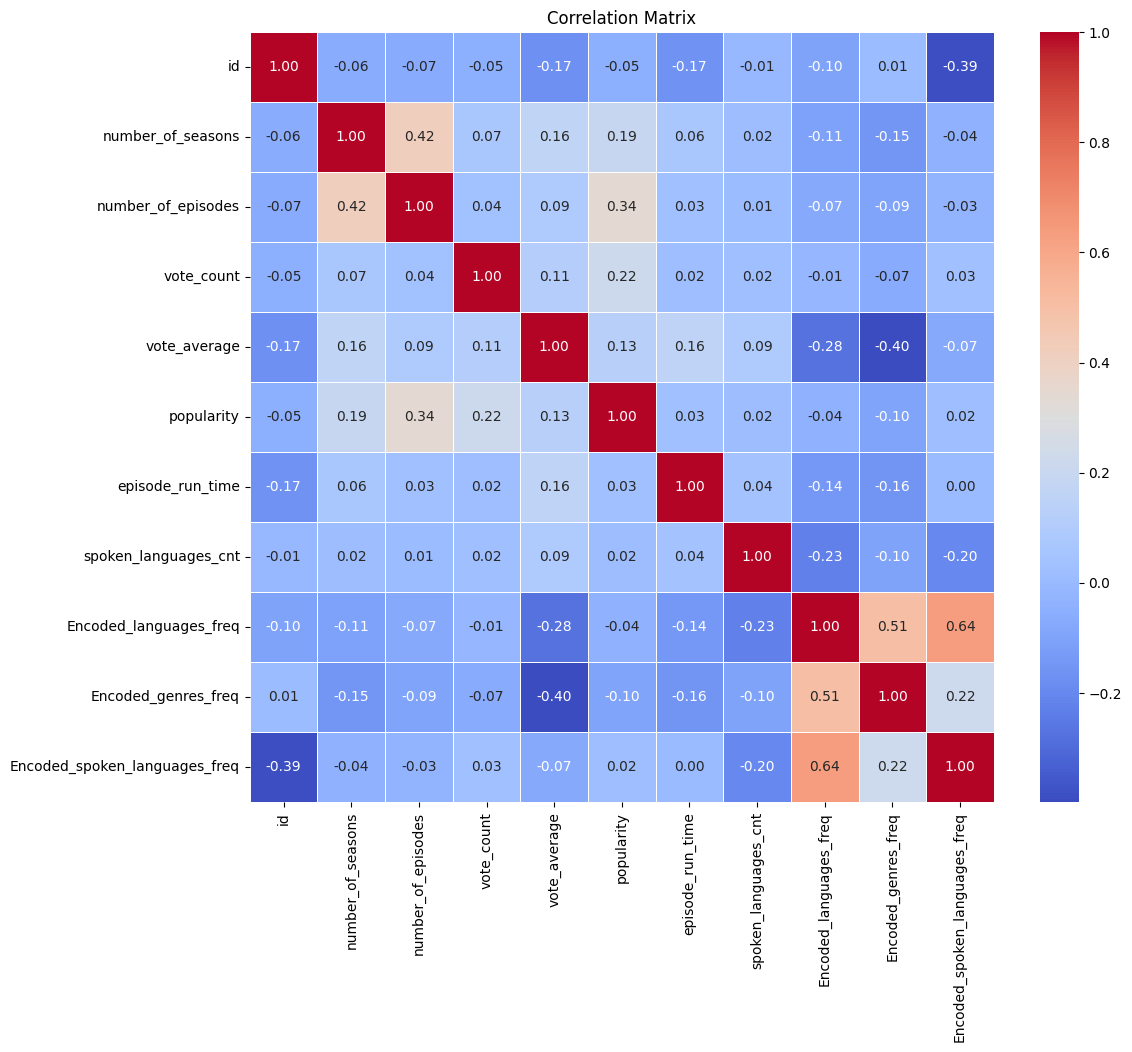

In [307]:
b35 = b34/2
gy_correlationdf(dfload)


In [ ]:
# Strong Correlations Analysis
# From your matrix, here are some notable correlations:

# number_of_episodes and number_of_seasons: 0.416147
# This indicates a moderate positive correlation between the number of episodes and the number of seasons. More episodes tend to be associated with more seasons.

# number_of_seasons and popularity: 0.189784
# This is a weak positive correlation. A higher number of seasons is slightly associated with higher popularity.

# vote_average and Encoded_genres_freq: -0.398457
# This indicates a moderate negative correlation between vote average and encoded genres frequency. Higher vote averages might be associated with fewer genre encodings.

# vote_average and Encoded_languages_freq: -0.074609
# This is a weak negative correlation, showing that vote average is almost independent of encoded languages frequency.

# Encoded_languages_freq and Encoded_genres_freq: -0.392479
# This indicates a moderate negative correlation. More frequent encoded languages might be associated with fewer genre encodings.

# Next Steps
# Visualize Correlations: Use heatmaps or scatter plots to visualize the strength and direction of these correlations.
# Explore Implications: Understand why certain variables might be correlated. For example, why are vote_average and Encoded_genres_freq negatively correlated?
# Consider Feature Engineering: If correlations reveal interesting patterns, you might incorporate them into feature engineering or model selection.

In [308]:
b36 = b35/2
# Get frequency of each origin_country
origin_country_frequency = dfload['origin_country'].value_counts()

print(origin_country_frequency)

US                                28489
JP                                13618
GB                                13284
CN                                11533
DE                                 6522
KR                                 6134
CA                                 4527
FR                                 4009
AU                                 3135
BR                                 2554
NL                                 2346
RU                                 2167
TH                                 2099
ES                                 2094
HK                                 2052
IN                                 2003
DK                                 1933
PH                                 1680
IT                                 1637
TR                                 1592
SE                                 1298
NO                                 1154
BE                                 1150
TW                                 1148
CZ                                 1038


C:\Users\DELL\AppData\Local\Temp\ipykernel_16292\363737597.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfload['continent'] = dfload['origin_country'].map(continent_map)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16292\363737597.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfload['continent'].fillna('Other', inplace=True)
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
findfont: Font family 'Noto Sans' not found.
find

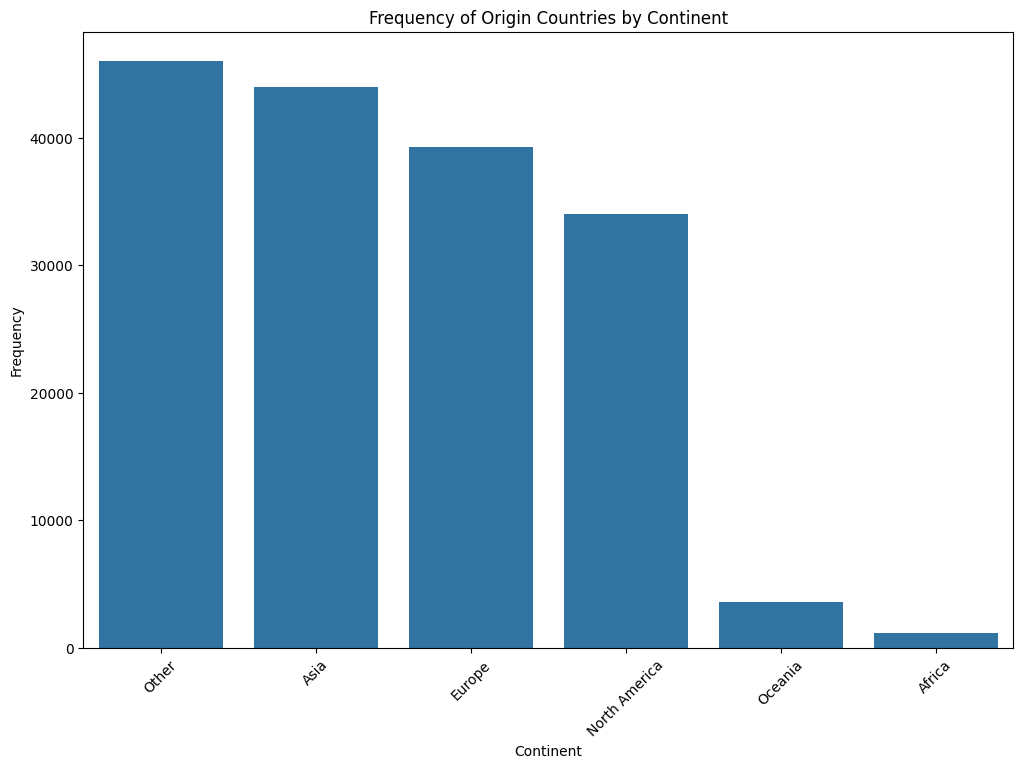

      id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False   
3  Sheriff's deputy Rick Grimes awaken

In [309]:
b37 = b36/2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define mapping of countries to continents
continent_map = {
    'US': 'North America',
    'CA': 'North America',
    'MX': 'North America',
    'GB': 'Europe',
    'FR': 'Europe',
    'DE': 'Europe',
    'IT': 'Europe',
    'ES': 'Europe',
    'RU': 'Europe',
    'SE': 'Europe',
    'NO': 'Europe',
    'NL': 'Europe',
    'PL': 'Europe',
    'DK': 'Europe',
    'GR': 'Europe',
    'CZ': 'Europe',
    'AU': 'Oceania',
    'NZ': 'Oceania',
    'JP': 'Asia',
    'CN': 'Asia',
    'KR': 'Asia',
    'IN': 'Asia',
    'TH': 'Asia',
    'PH': 'Asia',
    'ID': 'Asia',
    'SG': 'Asia',
    'MY': 'Asia',
    'TR': 'Asia',
    'HK': 'Asia',
    'PK': 'Asia',
    'AE': 'Asia',
    'SA': 'Asia',
    'IL': 'Asia',
    'VN': 'Asia',
    'BD': 'Asia',
    'UA': 'Europe',
    'EG': 'Africa',
    'ZA': 'Africa',
    'NG': 'Africa',
    'MA': 'Africa',
    # Add more countries and their continent mapping
}

# Map origin_country to continents
dfload['continent'] = dfload['origin_country'].map(continent_map)

# Handle unmapped countries
dfload['continent'].fillna('Other', inplace=True)

# Calculate frequency of each continent
continent_frequency = dfload['continent'].value_counts()


# Set the font to Noto Sans
plt.rcParams['font.family'] = 'Noto Sans'

# Plot the aggregated data
plt.figure(figsize=(12, 8))
sns.barplot(x=continent_frequency.index, y=continent_frequency.values)
plt.title('Frequency of Origin Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display the updated DataFrame with the new 'continent' column
print(dfload.head())


In [310]:
b38 = b37/2
dfload.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,Drop_first_air_date,last_air_date,homepage,in_production,original_name,popularity,poster_path,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,c_name,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last,continent
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,2011-04-17,2019-05-19,http://www.hbo.com/game-of-thrones,False,Game of Thrones,1083.917,/1XS1oqL89opfnbLl8WnZY1O1uJx.jpg,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,game of thrones,seven noble families fight for control of the ...,False,2011,04,17,North America,1,True,38671,86,73268,False,North America
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2017-05-02,2021-12-03,https://www.netflix.com/title/80192098,False,La Casa de Papel,96.354,/reEMJA1uzscCbkpeRJeTT2bjqUp.jpg,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Spanish,Vancouver Media,Spain,70,money heist,to carry out the biggest heist in history a my...,False,2017,05,02,Europe,1,False,3853,985,5178,False,Europe
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2016-07-15,2022-07-01,https://www.netflix.com/title/80057281,True,Stranger Things,185.711,/49WJfeN0moxb9IPfGn8AIqMGskD.jpg,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,stranger things,when a young boy vanishes a small town uncover...,False,2016,07,15,North America,1,True,38671,110,73268,False,North America
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,2010-10-31,2022-11-20,http://www.amc.com/shows/the-walking-dead--100...,False,The Walking Dead,489.746,/n7PVu0hSz2sAsVekpOIoCnkWlbn.jpg,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,the walking dead,sheriffs deputy rick grimes awakens from a com...,False,2010,10,31,North America,1,True,38671,127,73268,False,North America
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2016-01-25,2021-09-10,https://www.netflix.com/title/80057918,False,Lucifer,416.668,/ekZobS8isE6mA53RAiGDG93hBxL.jpg,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,lucifer,bored and unhappy as the lord of hell lucifer ...,False,2016,01,25,North America,1,True,38671,14,73268,False,North America


In [311]:
b39 = b38/2
dfload.to_pickle('my_dataframe_aftercleanCorr.pkl')

In [312]:
b40 = b39/2
import pandas as pd
#load from pickle 
dfload = pd.read_pickle('my_dataframe_aftercleanCorr.pkl')

In [313]:
# Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_aftercleanCorr.xlsx'
# dfload.to_excel(output_file, index=True)

In [314]:
b41 = b40/2
# Convert first_air_date_Year to numeric (if not already)
dfload['first_air_date_Year'] = pd.to_numeric(dfload['first_air_date_Year'], errors='coerce')

# Filter rows based on the given condition
filteredYear_df = dfload[(dfload['first_air_date_Year'] > 2015) & (dfload['first_air_date_Year'] < 2024)]


In [316]:
b42 = b41/2
gy_df_show_info_statistics(filteredYear_df, True)

      id             name  number_of_seasons  number_of_episodes  \
1  71446      Money Heist                  3                  41   
2  66732  Stranger Things                  4                  34   
4  63174          Lucifer                  6                  93   
5  69050        Riverdale                  7                 137   
6  93405       Squid Game                  2                   9   

  original_language  vote_count  vote_average  \
1                es       17836         8.257   
2                en       16161         8.624   
4                en       13870         8.486   
5                en       13180         8.479   
6                ko       13053         7.831   

                                            overview  adult  \
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False   
4  Bored and unhappy as the Lord of Hell, Lucifer...  False   
5  Set in the present, the series offers a b

In [317]:
b43 = b42/2
df_2024 = filteredYear_df[filteredYear_df['first_air_date_Year'] == 2024]

df_2024


,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,Drop_first_air_date,last_air_date,homepage,in_production,original_name,popularity,poster_path,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,c_name,c_overview,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last,continent


In [318]:
b44 = b43/2
gy_df_show_info_statistics(df_2024, True)

Empty DataFrame
Columns: [id, name, number_of_seasons, number_of_episodes, original_language, vote_count, vote_average, overview, adult, backdrop_path, Drop_first_air_date, last_air_date, homepage, in_production, original_name, popularity, poster_path, type, status, tagline, genres, created_by, languages, networks, origin_country, spoken_languages, production_companies, production_countries, episode_run_time, c_name, c_overview, v_adult, first_air_date_Year, first_air_date_M, first_air_date_D, origin_continent, spoken_languages_cnt, Is_en_in_spoken_languages, Encoded_languages_freq, Encoded_genres_freq, Encoded_spoken_languages_freq, is_duplicate_except_last, continent]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             0 non-null      int64  
 1   name                           0 

In [319]:
b45 = b44/2
# Set the maximum number of rows and columns to display
gy_configure_pandas_display("min")

In [322]:
b46 = b45/2
filteredYear_cleanDrop_df = gy_drop_columns_with_keyword(filteredYear_df)

In [323]:
b47 = b46*2
filteredYear_cleanDrop_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 66144 entries, 1 to 168638
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           66144 non-null  object 
 1   number_of_seasons              66144 non-null  int64  
 2   number_of_episodes             66144 non-null  int64  
 3   original_language              66144 non-null  object 
 4   vote_count                     66144 non-null  int64  
 5   vote_average                   66144 non-null  float64
 6   overview                       66144 non-null  object 
 7   adult                          66144 non-null  bool   
 8   backdrop_path                  43235 non-null  object 
 9   last_air_date                  65445 non-null  object 
 10  homepage                       28086 non-null  object 
 11  in_production                  66144 non-null  bool   
 12  original_name                  66144 non-null

In [324]:
b48 = b47*2
#To print all columns of a DataFrame as a list, you can simply access the columns attribute of the DataFrame and convert it to a list. Here’s how you can do it:

# Assuming filteredYear_cleanDrop_df is your DataFrame
columns_list = filteredYear_cleanDrop_df.columns.tolist()
print(columns_list)


['name', 'number_of_seasons', 'number_of_episodes', 'original_language', 'vote_count', 'vote_average', 'overview', 'adult', 'backdrop_path', 'last_air_date', 'homepage', 'in_production', 'original_name', 'popularity', 'poster_path', 'type', 'status', 'tagline', 'genres', 'created_by', 'languages', 'networks', 'origin_country', 'spoken_languages', 'production_companies', 'production_countries', 'episode_run_time', 'c_name', 'c_overview', 'v_adult', 'first_air_date_Year', 'first_air_date_M', 'first_air_date_D', 'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages', 'Encoded_languages_freq', 'Encoded_genres_freq', 'Encoded_spoken_languages_freq', 'is_duplicate_except_last', 'continent', 'id']


In [325]:
b49 = b48*2
gy_check_dataframe_index(filteredYear_cleanDrop_df)

The DataFrame has an index.
Index: Int64Index([     1,      2,      4,      5,      6,      8,      9,     12,
                14,     16,
            ...
            168623, 168624, 168626, 168627, 168628, 168630, 168633, 168634,
            168636, 168638],
           dtype='int64', length=66144)


In [326]:
b50 = b49*2
gy_print_column_types(filteredYear_cleanDrop_df)


Column 'name' has type 'object'
Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'original_language' has type 'object'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'float64'
Column 'overview' has type 'object'
Column 'adult' has type 'bool'
Column 'backdrop_path' has type 'object'
Column 'last_air_date' has type 'object'
Column 'homepage' has type 'object'
Column 'in_production' has type 'bool'
Column 'original_name' has type 'object'
Column 'popularity' has type 'float64'
Column 'poster_path' has type 'object'
Column 'type' has type 'object'
Column 'status' has type 'object'
Column 'tagline' has type 'object'
Column 'genres' has type 'object'
Column 'created_by' has type 'object'
Column 'languages' has type 'object'
Column 'networks' has type 'object'
Column 'origin_country' has type 'object'
Column 'spoken_languages' has type 'object'
Column 'production_companies' has type 'object'
Column 'production_countries' has

In [327]:
b51 = b50*2
filteredYear_cleanDrop_df.to_pickle('cleaned_data_column_aftercleanning_2015_2023.pkl')

In [328]:
b52 = b51*2
import pandas as pd
#load from pickle 
dfload = pd.read_pickle('cleaned_data_column_aftercleanning_2015_2023.pkl')

In [329]:
 # Save the cleaned DataFrame to an Excel file
# output_file = 'cleaned_data_column_aftercleanning_2015_2023.xlsx'
# filteredYear_cleanDrop_df.to_excel(output_file, index=True)

In [330]:
b53 = b52*2
# do round for column name list

df = gy_round_columns(dfload, ['vote_average', 'popularity'], 0)

In [331]:
b54 = b53*2
gy_print_column_types(df)

Column 'name' has type 'object'
Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'original_language' has type 'object'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'overview' has type 'object'
Column 'adult' has type 'bool'
Column 'backdrop_path' has type 'object'
Column 'last_air_date' has type 'object'
Column 'homepage' has type 'object'
Column 'in_production' has type 'bool'
Column 'original_name' has type 'object'
Column 'popularity' has type 'int64'
Column 'poster_path' has type 'object'
Column 'type' has type 'object'
Column 'status' has type 'object'
Column 'tagline' has type 'object'
Column 'genres' has type 'object'
Column 'created_by' has type 'object'
Column 'languages' has type 'object'
Column 'networks' has type 'object'
Column 'origin_country' has type 'object'
Column 'spoken_languages' has type 'object'
Column 'production_companies' has type 'object'
Column 'production_countries' has typ

In [332]:
b55 = b54*2
df.head()

,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,last_air_date,...,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last,continent,id
1,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2021-12-03,...,02,Europe,1,False,3853,985,5178,False,Europe,71446
2,Stranger Things,4,34,en,16161,9,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2022-07-01,...,15,North America,1,True,38671,110,73268,False,North America,66732
4,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2021-09-10,...,25,North America,1,True,38671,14,73268,False,North America,63174
5,Riverdale,7,137,en,13180,8,"Set in the present, the series offers a bold, ...",False,/soQgquPkLmUu9eKLJJzuA4KZDyi.jpg,2023-08-23,...,26,North America,1,True,38671,409,73268,False,North America,69050
6,Squid Game,2,9,ko,13053,8,Hundreds of cash-strapped players accept a str...,False,/2meX1nMdScFOoV4370rqHWKmXhY.jpg,2021-09-17,...,17,Unknown,3,True,1,38,1,False,Asia,93405


In [333]:
# skip it 

# listofstr = gy_extract_unique_texts(df, "networks")
# with open('unique_texts.txt', 'w') as f:
#     for item in listofstr:
#         f.write(f"{item}\n")

In [334]:
b56 = b55*2
gy_print_column_types(df)

Column 'name' has type 'object'
Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'original_language' has type 'object'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'overview' has type 'object'
Column 'adult' has type 'bool'
Column 'backdrop_path' has type 'object'
Column 'last_air_date' has type 'object'
Column 'homepage' has type 'object'
Column 'in_production' has type 'bool'
Column 'original_name' has type 'object'
Column 'popularity' has type 'int64'
Column 'poster_path' has type 'object'
Column 'type' has type 'object'
Column 'status' has type 'object'
Column 'tagline' has type 'object'
Column 'genres' has type 'object'
Column 'created_by' has type 'object'
Column 'languages' has type 'object'
Column 'networks' has type 'object'
Column 'origin_country' has type 'object'
Column 'spoken_languages' has type 'object'
Column 'production_companies' has type 'object'
Column 'production_countries' has typ

In [335]:
b57 = b56*2
df_prep = df.copy()

df_prep = gy_extract_and_categorize_networks(df_prep, "networks")


In [336]:
b58 = b57*2
df_prep

,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,last_air_date,...,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,is_duplicate_except_last,continent,id,v_network
1,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,2021-12-03,...,Europe,1,False,3853,985,5178,False,Europe,71446,Main Network
2,Stranger Things,4,34,en,16161,9,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,2022-07-01,...,North America,1,True,38671,110,73268,False,North America,66732,Main Network
4,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,2021-09-10,...,North America,1,True,38671,14,73268,False,North America,63174,Main Network
5,Riverdale,7,137,en,13180,8,"Set in the present, the series offers a bold, ...",False,/soQgquPkLmUu9eKLJJzuA4KZDyi.jpg,2023-08-23,...,North America,1,True,38671,409,73268,False,North America,69050,Other
6,Squid Game,2,9,ko,13053,8,Hundreds of cash-strapped players accept a str...,False,/2meX1nMdScFOoV4370rqHWKmXhY.jpg,2021-09-17,...,Unknown,3,True,1,38,1,False,Asia,93405,Main Network
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,Jhanak,1,32,hi,0,0,nan,False,/qsVujmyayl7oL7NfdOvCZAsxaB5.jpg,2023-12-21,...,Unknown,1,False,1421,16282,1405,False,Asia,240293,Other
168633,Jokah & Tutty,1,8,de,0,0,nan,False,/jS1ftJ6FfnAuj5No45v5pxAiUQa.jpg,2023-11-30,...,Europe,1,False,6204,25,7377,False,Europe,240693,Other
168634,母乳酱想要喷出来,1,1,zh,0,0,nan,False,NaN,2023-03-03,...,Unknown,1,False,58589,68926,14181,False,Asia,239099,Other
168636,Picasso,1,1,bn,0,0,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,2023-11-30,...,Unknown,1,False,199,1037,195,False,Asia,240696,Other


In [108]:
gy_print_column_types(df_prep)

Column 'name' has type 'object'
Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'original_language' has type 'object'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'overview' has type 'object'
Column 'adult' has type 'bool'
Column 'backdrop_path' has type 'object'
Column 'last_air_date' has type 'object'
Column 'homepage' has type 'object'
Column 'in_production' has type 'bool'
Column 'original_name' has type 'object'
Column 'popularity' has type 'int64'
Column 'poster_path' has type 'object'
Column 'type' has type 'object'
Column 'status' has type 'object'
Column 'tagline' has type 'object'
Column 'genres' has type 'object'
Column 'created_by' has type 'object'
Column 'languages' has type 'object'
Column 'networks' has type 'object'
Column 'origin_country' has type 'object'
Column 'spoken_languages' has type 'object'
Column 'production_companies' has type 'object'
Column 'production_countries' has typ

In [337]:
b59 = b58*2
# Define the list of columns to which the prefix will be added
columns_to_prefix = ['name','original_name', 'overview', 'c_overview',  'original_language', 'adult','backdrop_path', 'poster_path', 
                     'in_production', 'type', 'tagline', 'last_air_date', 'homepage', 'languages',
                     'created_by', 'spoken_languages', 'origin_country','networks', 'production_companies' , 
                     'genres','production_countries', 'continent', 'c_name']

                     #Reasons to sign Drop Later will be dropped 
# original_language is already descriptive in  origin_country
# original_name is already descriptive in  name
# last_air_date && in_production leads to contradictions Vs. Status. Staus prefered.  (Why
# backdrop_path & poster_path do not provide useful information for predicting popularity - just image paths and do not contain numerical or categorical information that could influence the model.               
# type  is  with no unique data most of the dayta is scripted Most Common Scripted 77%
# tagline is with 97% NULL MISSING VALUES 
# Created by  78% NuLL
# Define the prefix to add
prefix = 'Drop'

# Use the function to add the prefix
df = gy_add_prefix_to_columns(df_prep, columns_to_prefix, prefix)



In [338]:
b60 = b59*2
gy_print_column_types(df)

Column 'Drop_name' has type 'object'
Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'Drop_original_language' has type 'object'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'Drop_overview' has type 'object'
Column 'Drop_adult' has type 'bool'
Column 'Drop_backdrop_path' has type 'object'
Column 'Drop_last_air_date' has type 'object'
Column 'Drop_homepage' has type 'object'
Column 'Drop_in_production' has type 'bool'
Column 'Drop_original_name' has type 'object'
Column 'popularity' has type 'int64'
Column 'Drop_poster_path' has type 'object'
Column 'Drop_type' has type 'object'
Column 'status' has type 'object'
Column 'Drop_tagline' has type 'object'
Column 'Drop_genres' has type 'object'
Column 'Drop_created_by' has type 'object'
Column 'Drop_languages' has type 'object'
Column 'Drop_networks' has type 'object'
Column 'Drop_origin_country' has type 'object'
Column 'Drop_spoken_languages' has type 'obj

In [339]:
b61 = b60*2

df_prep = gy_drop_columns_with_keyword(df)

In [340]:
b62 = b61*2
gy_print_column_types(df_prep)

Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'popularity' has type 'int64'
Column 'status' has type 'object'
Column 'episode_run_time' has type 'int64'
Column 'c_name' has type 'object'
Column 'v_adult' has type 'bool'
Column 'first_air_date_Year' has type 'float64'
Column 'first_air_date_M' has type 'object'
Column 'first_air_date_D' has type 'object'
Column 'origin_continent' has type 'object'
Column 'spoken_languages_cnt' has type 'int64'
Column 'Is_en_in_spoken_languages' has type 'bool'
Column 'Encoded_languages_freq' has type 'int64'
Column 'Encoded_genres_freq' has type 'int64'
Column 'Encoded_spoken_languages_freq' has type 'int64'
Column 'is_duplicate_except_last' has type 'bool'
Column 'v_network' has type 'object'
Column 'id' has type 'int64'


In [344]:
df = gy_add_prefix_to_columns(df, ['is_duplicate_except_last'], 'Drop')

In [345]:
df_prep = gy_drop_columns_with_keyword(df)

In [349]:
gy_print_column_types(df_prep)

Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'popularity' has type 'int64'
Column 'status' has type 'object'
Column 'episode_run_time' has type 'int64'
Column 'v_adult' has type 'bool'
Column 'first_air_date_Year' has type 'float64'
Column 'first_air_date_M' has type 'object'
Column 'first_air_date_D' has type 'object'
Column 'origin_continent' has type 'object'
Column 'spoken_languages_cnt' has type 'int64'
Column 'Is_en_in_spoken_languages' has type 'bool'
Column 'Encoded_languages_freq' has type 'int64'
Column 'Encoded_genres_freq' has type 'int64'
Column 'Encoded_spoken_languages_freq' has type 'int64'
Column 'v_network' has type 'object'
Column 'id' has type 'int64'


In [350]:
df2 = df_prep.copy()
# some of the conversion doest work  - Reasons could be missing values.
print(df2['status'].isnull().sum())  #Ensure there are no missing values in the column before converting it to a category:
print(df2.columns)
print(df2['status'].dtype)

# Convert boolean column to categorical type
df2.loc[:, 'status'] = df2['status'].astype('category')
df2.loc[:, 'v_network'] = df2['v_network'].astype('category')
df2.loc[:, 'Is_en_in_spoken_languages'] = df2['Is_en_in_spoken_languages'].astype('category')
df2.loc[:, 'origin_continent'] = df2['origin_continent'].astype('category')
df2.loc[:, 'v_adult'] = df2['v_adult'].astype('category')

# Convert to numeric, coerce errors to NaN
df2['first_air_date_Year'] = pd.to_numeric(df2['first_air_date_Year'], errors='coerce')
df2['first_air_date_M'] = pd.to_numeric(df2['first_air_date_M'], errors='coerce')
df2['first_air_date_D'] = pd.to_numeric(df2['first_air_date_D'], errors='coerce')


0
Index(['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average',
       'popularity', 'status', 'episode_run_time', 'v_adult',
       'first_air_date_Year', 'first_air_date_M', 'first_air_date_D',
       'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'id'],
      dtype='object')
object


C:\Users\DELL\AppData\Local\Temp\ipykernel_16292\1842757310.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'status'] = df2['status'].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16292\1842757310.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.loc[:, 'v_network'] = df2['v_network'].astype('category')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16292\1842757310.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new

In [352]:
gy_print_column_types(df2)

Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'popularity' has type 'int64'
Column 'status' has type 'category'
Column 'episode_run_time' has type 'int64'
Column 'v_adult' has type 'category'
Column 'first_air_date_Year' has type 'float64'
Column 'first_air_date_M' has type 'int64'
Column 'first_air_date_D' has type 'int64'
Column 'origin_continent' has type 'category'
Column 'spoken_languages_cnt' has type 'int64'
Column 'Is_en_in_spoken_languages' has type 'category'
Column 'Encoded_languages_freq' has type 'int64'
Column 'Encoded_genres_freq' has type 'int64'
Column 'Encoded_spoken_languages_freq' has type 'int64'
Column 'v_network' has type 'category'
Column 'id' has type 'int64'


In [353]:
df2.to_pickle('cleaned_data_column_towardFlatFile1_2015_2023.pkl')

In [354]:
# List of column names to process
columns_to_process = ['status', 'v_adult']

# Loop through each column name
for column in columns_to_process:
    df2, combination_mapping = encode_col_combinations(df2, column)
    
    # Display the processed DataFrame and combination mapping
    print(f"Processed DataFrame for column '{column}':")
    print(df_processed.head())  # Display first few rows for inspection
    print(f"Combination Mapping for column '{column}':")
    print(combination_mapping)
    print("\n" + "="*50 + "\n")  # Separator for readability


Processed DataFrame for column 'status':
      id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False 

In [355]:
# Convert 'first_air_date_Year' to int64
df2['first_air_date_Year'] = df2['first_air_date_Year'].astype('int64')

In [356]:
gy_print_column_types(df2)

Column 'number_of_seasons' has type 'int64'
Column 'number_of_episodes' has type 'int64'
Column 'vote_count' has type 'int64'
Column 'vote_average' has type 'int64'
Column 'popularity' has type 'int64'
Column 'status' has type 'category'
Column 'episode_run_time' has type 'int64'
Column 'v_adult' has type 'category'
Column 'first_air_date_Year' has type 'int64'
Column 'first_air_date_M' has type 'int64'
Column 'first_air_date_D' has type 'int64'
Column 'origin_continent' has type 'category'
Column 'spoken_languages_cnt' has type 'int64'
Column 'Is_en_in_spoken_languages' has type 'category'
Column 'Encoded_languages_freq' has type 'int64'
Column 'Encoded_genres_freq' has type 'int64'
Column 'Encoded_spoken_languages_freq' has type 'int64'
Column 'v_network' has type 'category'
Column 'id' has type 'int64'
Column 'Encoded_status' has type 'category'
Column 'Encoded_v_adult' has type 'int64'


In [358]:
gy_check_dataframe(df2)

Checking column: number_of_seasons
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 66113
Value counts:
1     54442
2      6667
3      2333
4      1166
5       630
6       369
7       228
8       135
10       38
9        37
11       22
12       22
13       11
14       10
15        6
21        5
16        5
18        2
48        2
20        2
32        2
17        1
26        1
22        1
56        1
19        1
24        1
75        1
25        1
34        1
54        1
Name: number_of_seasons, dtype: int64


Checking column: number_of_episodes
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 65713
Value counts:
1      12766
6       5231
8       4592
4       3955
10      3916
       ...  
599        1
337        1
184        1
663        1
276        1
Name: number_of_episodes, Length: 431, dtype: int64


Checking column: vote_count
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 65404
Value counts:
0        40116
1         9970
2         3857
3

In [359]:
b51 = b50*2
df2.to_pickle('cleaned_data_column_towardFlatFile2_2015_2023.pkl')

In [396]:

import pandas as pd
#load from pickle 
dfload = pd.read_pickle('cleaned_data_column_towardFlatFile2_2015_2023.pkl')

In [397]:
print(dfload.columns)


Index(['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average',
       'popularity', 'status', 'episode_run_time', 'v_adult',
       'first_air_date_Year', 'first_air_date_M', 'first_air_date_D',
       'origin_continent', 'spoken_languages_cnt', 'Is_en_in_spoken_languages',
       'Encoded_languages_freq', 'Encoded_genres_freq',
       'Encoded_spoken_languages_freq', 'v_network', 'id', 'Encoded_status',
       'Encoded_v_adult'],
      dtype='object')


In [398]:
# Save the cleaned DataFrame to an Excel file
output_file = 'cleaned_data_column_towardFlatFile2_2015_2023.xlsx'
dfload.to_excel(output_file, index=True)

In [399]:
dfload

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,status,episode_run_time,v_adult,first_air_date_Year,first_air_date_M,...,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,id,Encoded_status,Encoded_v_adult
1,3,41,17836,8,96,Ended,70,False,2017,5,...,Europe,1,False,3853,985,5178,Main Network,71446,0,0
2,4,34,16161,9,186,Returning Series,0,False,2016,7,...,North America,1,True,38671,110,73268,Main Network,66732,1,0
4,6,93,13870,8,417,Ended,45,False,2016,1,...,North America,1,True,38671,14,73268,Main Network,63174,0,0
5,7,137,13180,8,144,Ended,45,False,2017,1,...,North America,1,True,38671,409,73268,Other,69050,0,0
6,2,9,13053,8,116,Returning Series,0,False,2021,9,...,Unknown,3,True,1,38,1,Main Network,93405,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,1,32,0,0,4,Returning Series,0,False,2023,11,...,Unknown,1,False,1421,16282,1405,Other,240293,1,0
168633,1,8,0,0,3,Returning Series,0,False,2023,11,...,Europe,1,False,6204,25,7377,Other,240693,1,0
168634,1,1,0,0,1,Returning Series,0,False,2023,3,...,Unknown,1,False,58589,68926,14181,Other,239099,1,0
168636,1,1,0,0,2,Returning Series,0,False,2023,11,...,Unknown,1,False,199,1037,195,Other,240696,1,0


In [400]:
# Remove duplicates from 'c_name' column, keeping the last occurrence
#  df_no_duplicates = df2.drop_duplicates(subset=['c_name'], keep='last') 
# dont remove duplicate die to naming issues- movie start with same text but it is tottaly different  one.
# remove duplicate in ID fetaure.
df_no_duplicates = dfload.drop_duplicates(subset=['id'], keep='last')
# in Id alone -clear duplication of ID


In [401]:
gy_check_dataframe(df_no_duplicates)

Checking column: number_of_seasons
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 64180
Value counts:
1     52669
2      6573
3      2301
4      1145
5       625
6       364
7       226
8       134
10       38
9        37
11       22
12       22
13       11
14       10
15        6
21        5
16        5
18        2
48        2
20        2
32        2
17        1
26        1
22        1
56        1
19        1
24        1
75        1
25        1
34        1
54        1
Name: number_of_seasons, dtype: int64


Checking column: number_of_episodes
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 63780
Value counts:
1      12185
6       5070
8       4492
10      3841
4       3802
       ...  
599        1
337        1
184        1
663        1
276        1
Name: number_of_episodes, Length: 431, dtype: int64


Checking column: vote_count
Null values: 0
None values: 0
NaN values: 0
Duplicate values: 63471
Value counts:
0        38385
1         9805
2         3844
3

In [402]:
b63 = b62*2
df_no_duplicates.head


<bound method NDFrame.head of         number_of_seasons  number_of_episodes  vote_count  vote_average  \
1                       3                  41       17836             8   
2                       4                  34       16161             9   
4                       6                  93       13870             8   
5                       7                 137       13180             8   
6                       2                   9       13053             8   
...                   ...                 ...         ...           ...   
168630                  1                  32           0             0   
168633                  1                   8           0             0   
168634                  1                   1           0             0   
168636                  1                   1           0             0   
168638                  1                   5           0             0   

        popularity            status  episode_run_time v_adult  \
1  

In [407]:
df_toclean= df_no_duplicates.copy()
df = gy_add_prefix_to_columns(df_toclean, ['status'], 'Drop')


In [408]:
df_no_duplicates = gy_drop_columns_with_keyword(df)

In [409]:
df_no_duplicates

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_status,Encoded_v_adult,id
1,3,41,17836,8,96,70,False,2017,5,2,Europe,1,False,3853,985,5178,Main Network,0,0,71446
2,4,34,16161,9,186,0,False,2016,7,15,North America,1,True,38671,110,73268,Main Network,1,0,66732
4,6,93,13870,8,417,45,False,2016,1,25,North America,1,True,38671,14,73268,Main Network,0,0,63174
5,7,137,13180,8,144,45,False,2017,1,26,North America,1,True,38671,409,73268,Other,0,0,69050
6,2,9,13053,8,116,0,False,2021,9,17,Unknown,3,True,1,38,1,Main Network,1,0,93405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,1,32,0,0,4,0,False,2023,11,20,Unknown,1,False,1421,16282,1405,Other,1,0,240293
168633,1,8,0,0,3,0,False,2023,11,30,Europe,1,False,6204,25,7377,Other,1,0,240693
168634,1,1,0,0,1,0,False,2023,3,3,Unknown,1,False,58589,68926,14181,Other,1,0,239099
168636,1,1,0,0,2,0,False,2023,11,30,Unknown,1,False,199,1037,195,Other,1,0,240696


In [417]:
# Save the cleaned DataFrame to an Excel file Remove dup of id .
output_file = 'cleaned_data_column_towardFlatFile3_2015_2023.xlsx'
df_no_duplicates.to_excel(output_file, index=True)

In [418]:
df_no_duplicates.to_pickle('cleaned_data_column_towardFlatFile3_2015_2023.pkl')

In [1]:
# Final Flat File 
import pandas as pd
#load from pickle 
dfload1 = pd.read_pickle('cleaned_data_column_towardFlatFile3_2015_2023.pkl')




In [2]:
dfload1.head()

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time,v_adult,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_status,Encoded_v_adult,id
1,3,41,17836,8,96,70,False,2017,5,2,Europe,1,False,3853,985,5178,Main Network,0,0,71446
2,4,34,16161,9,186,0,False,2016,7,15,North America,1,True,38671,110,73268,Main Network,1,0,66732
4,6,93,13870,8,417,45,False,2016,1,25,North America,1,True,38671,14,73268,Main Network,0,0,63174
5,7,137,13180,8,144,45,False,2017,1,26,North America,1,True,38671,409,73268,Other,0,0,69050
6,2,9,13053,8,116,0,False,2021,9,17,Unknown,3,True,1,38,1,Main Network,1,0,93405


In [3]:
gy_preprocess_dataframe(dfload1)

NameError: name 'gy_preprocess_dataframe' is not defined

In [9]:
df3 = gy_add_prefix_to_columns(dfload1, ['v_adult'], 'Drop')
df_no_duplicates1 = gy_drop_columns_with_keyword(df3)

In [10]:
df_no_duplicates1


,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_status,Encoded_v_adult,id
1,3,41,17836,8,96,70,2017,5,2,Europe,1,False,3853,985,5178,Main Network,0,0,71446
2,4,34,16161,9,186,0,2016,7,15,North America,1,True,38671,110,73268,Main Network,1,0,66732
4,6,93,13870,8,417,45,2016,1,25,North America,1,True,38671,14,73268,Main Network,0,0,63174
5,7,137,13180,8,144,45,2017,1,26,North America,1,True,38671,409,73268,Other,0,0,69050
6,2,9,13053,8,116,0,2021,9,17,Unknown,3,True,1,38,1,Main Network,1,0,93405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,1,32,0,0,4,0,2023,11,20,Unknown,1,False,1421,16282,1405,Other,1,0,240293
168633,1,8,0,0,3,0,2023,11,30,Europe,1,False,6204,25,7377,Other,1,0,240693
168634,1,1,0,0,1,0,2023,3,3,Unknown,1,False,58589,68926,14181,Other,1,0,239099
168636,1,1,0,0,2,0,2023,11,30,Unknown,1,False,199,1037,195,Other,1,0,240696


In [11]:
# Save the cleaned DataFrame to an Excel file Remove dup of id .
output_file = 'cleaned_data_column_FlatFileRe_2015_2023.xlsx'
df_no_duplicates1.to_excel(output_file, index=True)

In [12]:
df_no_duplicates1.to_pickle('cleaned_data_column_FlatFileRe_2015_2023.pkl')


In [13]:
# Final Flat File 
import pandas as pd
#load from pickle 
dfload1 = pd.read_pickle('cleaned_data_column_FlatFileRe_2015_2023.pkl')

In [14]:
dfload1

,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time,first_air_date_Year,first_air_date_M,first_air_date_D,origin_continent,spoken_languages_cnt,Is_en_in_spoken_languages,Encoded_languages_freq,Encoded_genres_freq,Encoded_spoken_languages_freq,v_network,Encoded_status,Encoded_v_adult,id
1,3,41,17836,8,96,70,2017,5,2,Europe,1,False,3853,985,5178,Main Network,0,0,71446
2,4,34,16161,9,186,0,2016,7,15,North America,1,True,38671,110,73268,Main Network,1,0,66732
4,6,93,13870,8,417,45,2016,1,25,North America,1,True,38671,14,73268,Main Network,0,0,63174
5,7,137,13180,8,144,45,2017,1,26,North America,1,True,38671,409,73268,Other,0,0,69050
6,2,9,13053,8,116,0,2021,9,17,Unknown,3,True,1,38,1,Main Network,1,0,93405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168630,1,32,0,0,4,0,2023,11,20,Unknown,1,False,1421,16282,1405,Other,1,0,240293
168633,1,8,0,0,3,0,2023,11,30,Europe,1,False,6204,25,7377,Other,1,0,240693
168634,1,1,0,0,1,0,2023,3,3,Unknown,1,False,58589,68926,14181,Other,1,0,239099
168636,1,1,0,0,2,0,2023,11,30,Unknown,1,False,199,1037,195,Other,1,0,240696


In [ ]:
#The End